In [40]:
%pip install os
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install python-dotenv
%pip install openai
%pip install langchain
%pip install gradio
%pip install transformers
%pip install nltk
%pip install WordCloud

import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import openai
from langchain.llms import OpenAI
import gradio as gr
import transformers

print("Todas las librerías se importaron correctamente!")

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Todas las librerías se importaron correctamente!


In [41]:
import kagglehub

path = kagglehub.dataset_download("pooriamst/best-books-ever-dataset")
print("Path to dataset files:", path)

images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)

Path to dataset files: C:\Users\ivang\.cache\kagglehub\datasets\pooriamst\best-books-ever-dataset\versions\1


In [42]:
pd.set_option('display.max_columns', None)

books_original = pd.read_csv(f"{path}/books_1.Best_Books_Ever.csv")
books = books_original.copy()

In [43]:
cols = []
for i in range(len(books.columns)):
    cols.append(books.columns[i].lower())

books.columns = cols

In [44]:
books.describe()

rating    numratings  likedpercent      bbescore      bbevotes
count  52478.000000  5.247800e+04  51856.000000  5.247800e+04  52478.000000
mean       4.021878  1.787865e+04     92.231545  1.984023e+03     22.529003
std        0.367146  1.039448e+05      5.990689  3.515314e+04    369.158541
min        0.000000  0.000000e+00      0.000000  0.000000e+00     -4.000000
25%        3.820000  3.410000e+02     90.000000  8.400000e+01      1.000000
50%        4.030000  2.307000e+03     94.000000  9.700000e+01      1.000000
75%        4.230000  9.380500e+03     96.000000  1.870000e+02      2.000000
max        5.000000  7.048471e+06    100.000000  2.993816e+06  30516.000000

In [45]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookid            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookformat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishdate       51598 non-null  object 
 15  firstpublishdate  31152 non-null  object 
 16  awards            52478 non-null  object

In [46]:

# Convertir tipos de datos según corresponda para las columnas reales
try:
    # Columnas numéricas
    books['bookid'] = pd.to_numeric(books['bookid'], errors='coerce').fillna(0).astype('int32')
    books['rating'] = pd.to_numeric(books['rating'], errors='coerce').astype('float32')
    books['pages'] = pd.to_numeric(books['pages'], errors='coerce').fillna(0).astype('int32')
    books['numratings'] = pd.to_numeric(books['numratings'], errors='coerce').fillna(0).astype('int32')
    books['likedpercent'] = pd.to_numeric(books['likedpercent'], errors='coerce').astype('float32')
    books['bbescore'] = pd.to_numeric(books['bbescore'], errors='coerce').astype('float32')
    books['bbevotes'] = pd.to_numeric(books['bbevotes'], errors='coerce').fillna(0).astype('int32')
    books['price'] = pd.to_numeric(books['price'], errors='coerce').astype('float32')
    
    # Columnas categóricas
    categorical_columns = ['language', 'bookformat', 'genres']
    for col in categorical_columns:
        books[col] = books[col].astype('category')
    
    text_columns = ['title', 'series', 'author', 'description', 'isbn', 
                    'characters', 'edition', 'publisher', 'awards', 'setting', 'coverimg']
    for col in text_columns:
        books[col] = books[col].astype(str)
        books[col] = books[col].replace(['nan', 'None', 'none', 'NULL', 'null', '', '[]'], np.nan)
        books[col] = books[col].replace(r'^\s*$', np.nan, regex=True)
    
    # Columnas de fecha
    default_date = pd.Timestamp('2000-01-01')   
    date_columns = ['publishdate', 'firstpublishdate']
    for col in date_columns:
        books[col] = pd.to_datetime(books[col], errors='coerce')
        books[col] = books[col].fillna(default_date)
        books[col] = books[col].dt.normalize()
    
    # Columna ratingsbystars (probablemente un diccionario o estructura JSON)
    # Mantenerla como string por ahora, se puede procesar después si es necesario
    books['ratingsbystars'] = books['ratingsbystars'].astype(str)
    
    print("\nConversión de tipos completada con éxito")
except Exception as e:
    print(f"Error durante la conversión: {e}")

# Verificar los nuevos tipos de datos
print("\nInformación actualizada del DataFrame:")
books.info()

C:\Users\ivang\AppData\Local\Temp\ipykernel_30796\1162578674.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  books[col] = pd.to_datetime(books[col], errors='coerce')
C:\Users\ivang\AppData\Local\Temp\ipykernel_30796\1162578674.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  books[col] = pd.to_datetime(books[col], errors='coerce')



Conversión de tipos completada con éxito

Información actualizada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookid            52478 non-null  int32         
 1   title             52478 non-null  object        
 2   series            23469 non-null  object        
 3   author            52478 non-null  object        
 4   rating            52478 non-null  float32       
 5   description       51140 non-null  object        
 6   language          48672 non-null  category      
 7   isbn              52478 non-null  object        
 8   genres            52478 non-null  category      
 9   characters        13766 non-null  object        
 10  bookformat        51005 non-null  category      
 11  edition           4955 non-null   object        
 12  pages             52478 non-null  int32         

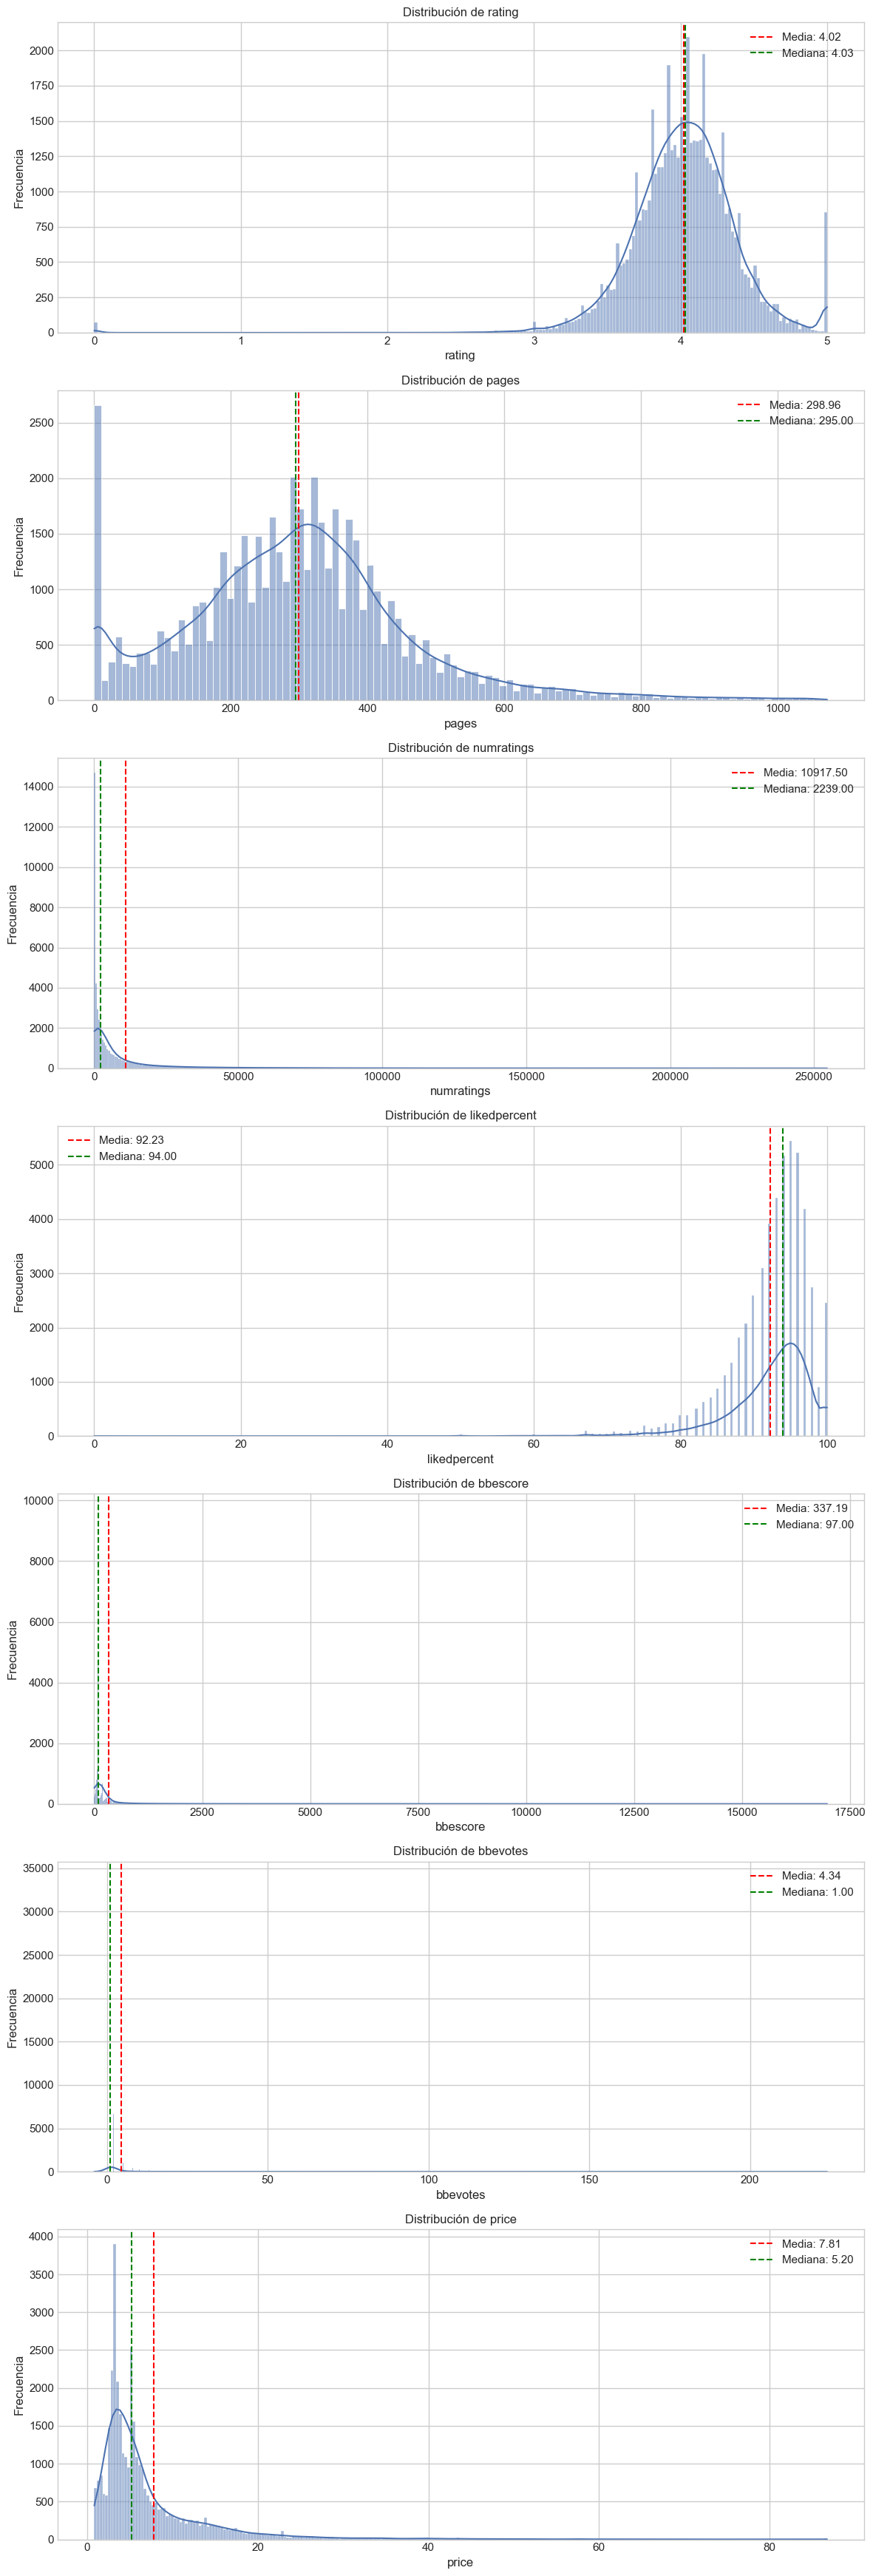

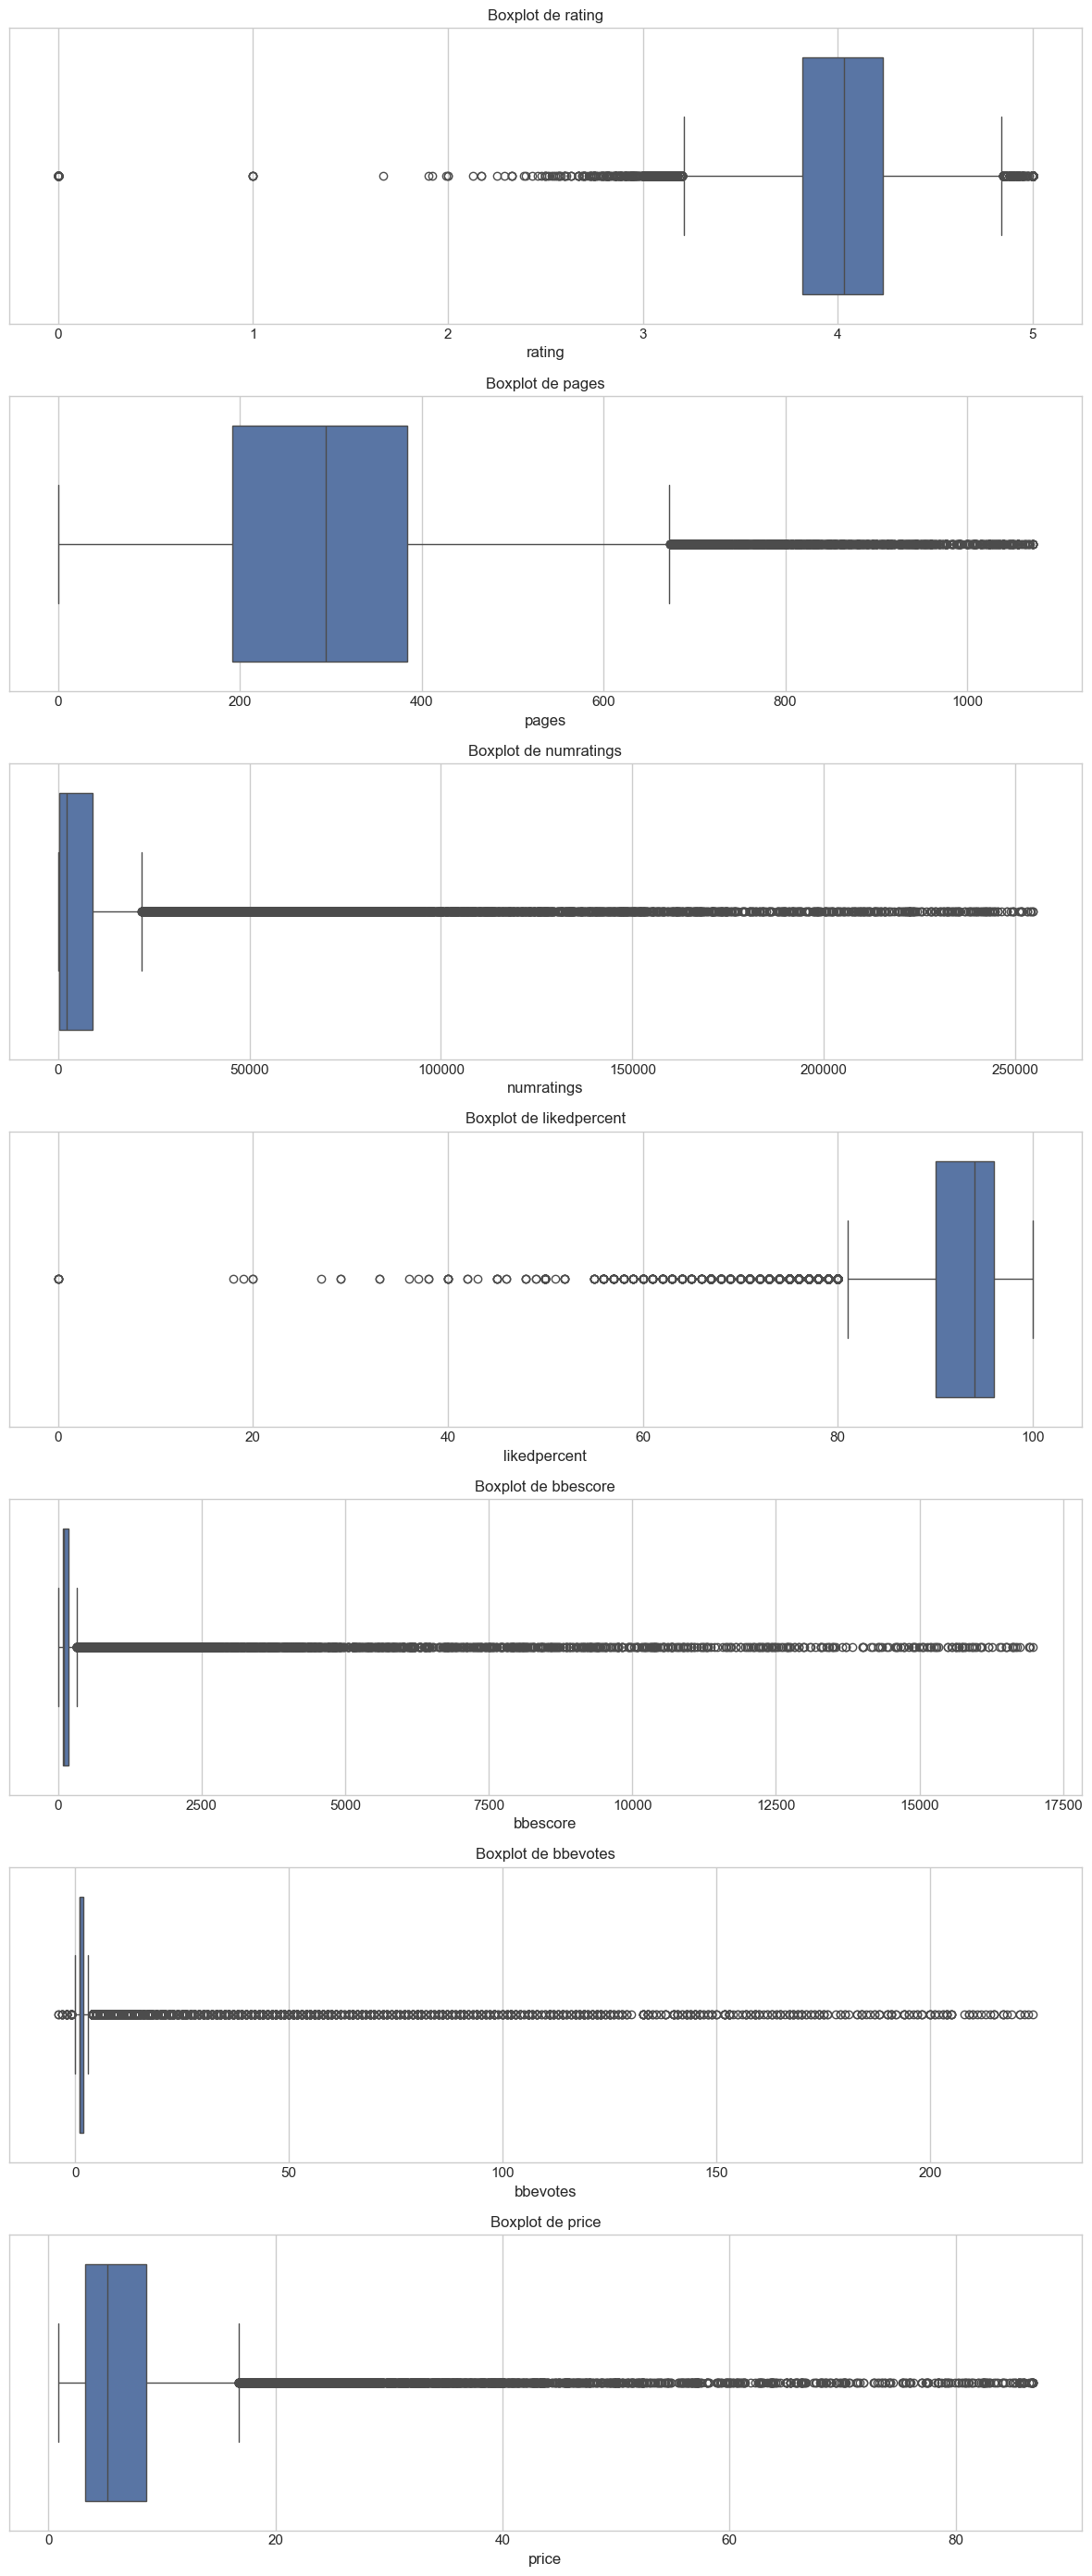

In [47]:
# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Lista de variables numéricas
numeric_vars = ['rating', 'pages', 'numratings', 'likedpercent', 
                'bbescore', 'bbevotes', 'price']

# Verificar que las columnas existen y son numéricas
valid_numeric_vars = []
for var in numeric_vars:
    if var in books.columns:
        # Intentar convertir a numérico si no lo es
        if not pd.api.types.is_numeric_dtype(books[var]):
            try:
                books[var] = pd.to_numeric(books[var], errors='coerce')
                print(f"Columna '{var}' convertida a numérica")
            except:
                print(f"No se pudo convertir la columna '{var}' a numérica")
                continue
        valid_numeric_vars.append(var)
    else:
        print(f"La columna '{var}' no existe en el dataset")

# 1. Histogramas para cada variable numérica
if valid_numeric_vars:
    fig, axes = plt.subplots(len(valid_numeric_vars), 1, figsize=(12, 5*len(valid_numeric_vars)))
    if len(valid_numeric_vars) == 1:
        axes = [axes]  # Convertir a lista si solo hay una variable
    
    for i, var in enumerate(valid_numeric_vars):
        # Eliminar valores nulos y outliers extremos (percentil 99)
        data = books[var].dropna()
        if len(data) > 0:
            upper_limit = np.percentile(data, 99)
            data = data[data <= upper_limit]
            
            sns.histplot(data, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {var}')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frecuencia')
            
            # Añadir líneas para media y mediana
            mean_val = data.mean()
            median_val = data.median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
            axes[i].legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'histogramas_variables_numericas.png'))
    plt.show()
else:
    print("No hay variables numéricas válidas para visualizar")

# 2. Boxplots para cada variable numérica
if valid_numeric_vars:
    fig, axes = plt.subplots(len(valid_numeric_vars), 1, figsize=(12, 4*len(valid_numeric_vars)))
    if len(valid_numeric_vars) == 1:
        axes = [axes]  # Convertir a lista si solo hay una variable
    
    for i, var in enumerate(valid_numeric_vars):
        # Eliminar valores nulos y outliers extremos
        data = books[var].dropna()
        if len(data) > 0:
            upper_limit = np.percentile(data, 99)
            data = data[data <= upper_limit]
            
            sns.boxplot(x=data, ax=axes[i])
            axes[i].set_title(f'Boxplot de {var}')
            axes[i].set_xlabel(var)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'boxplots_variables_numericas.png'))
    plt.show()

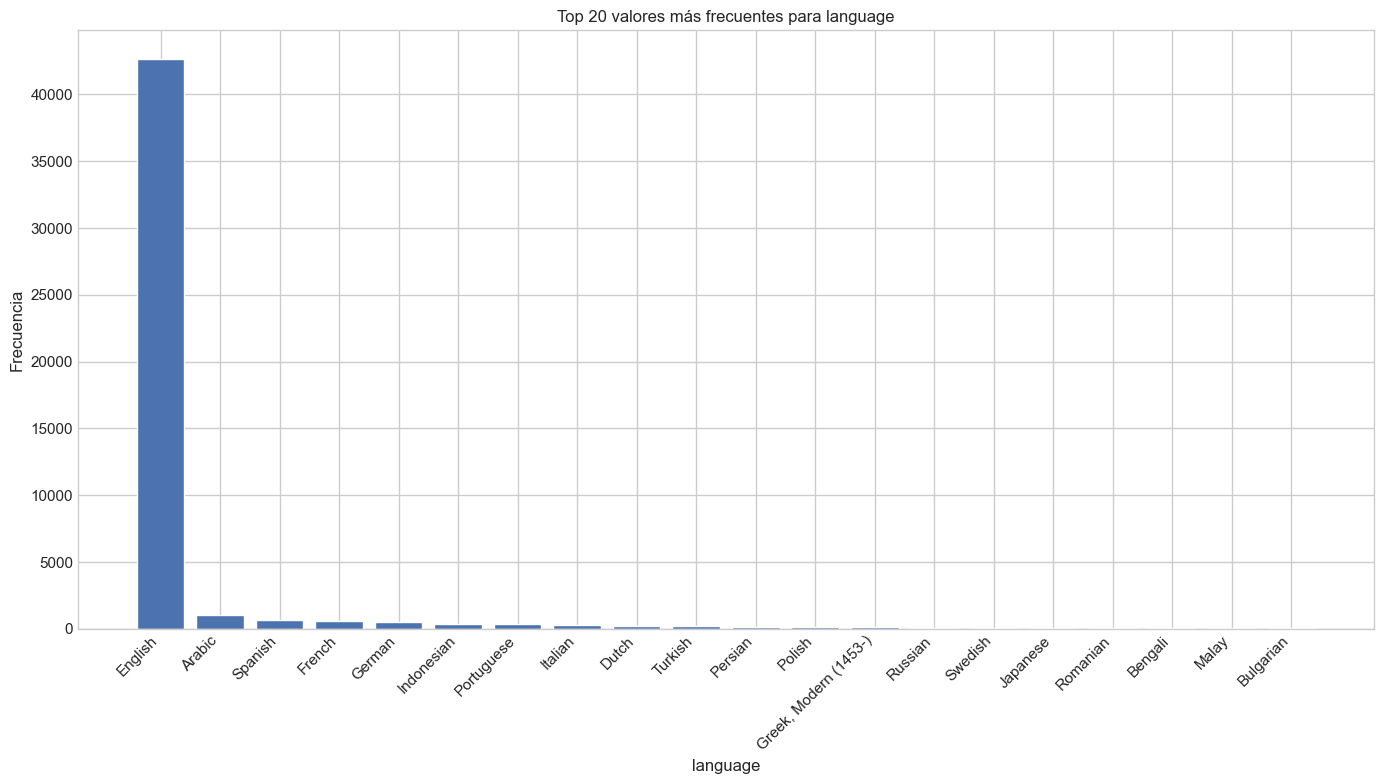

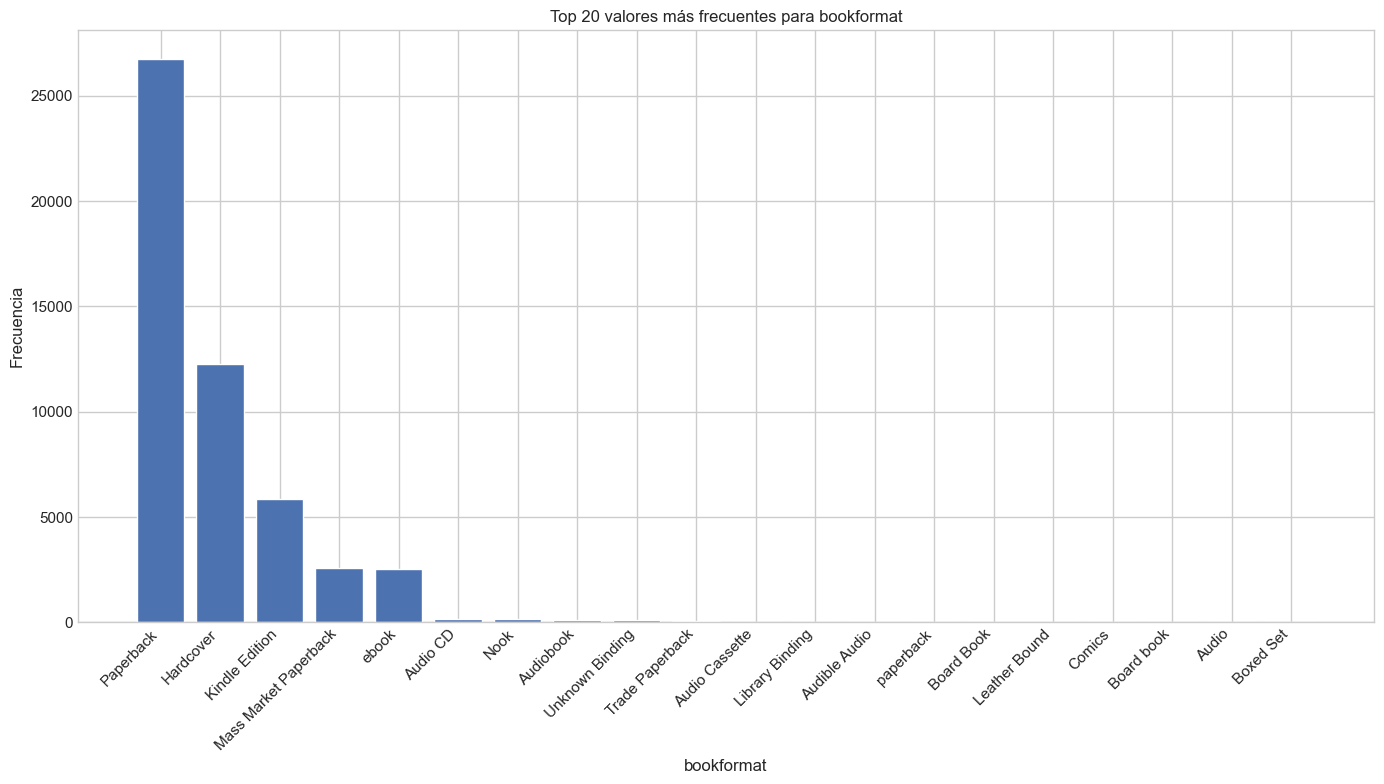

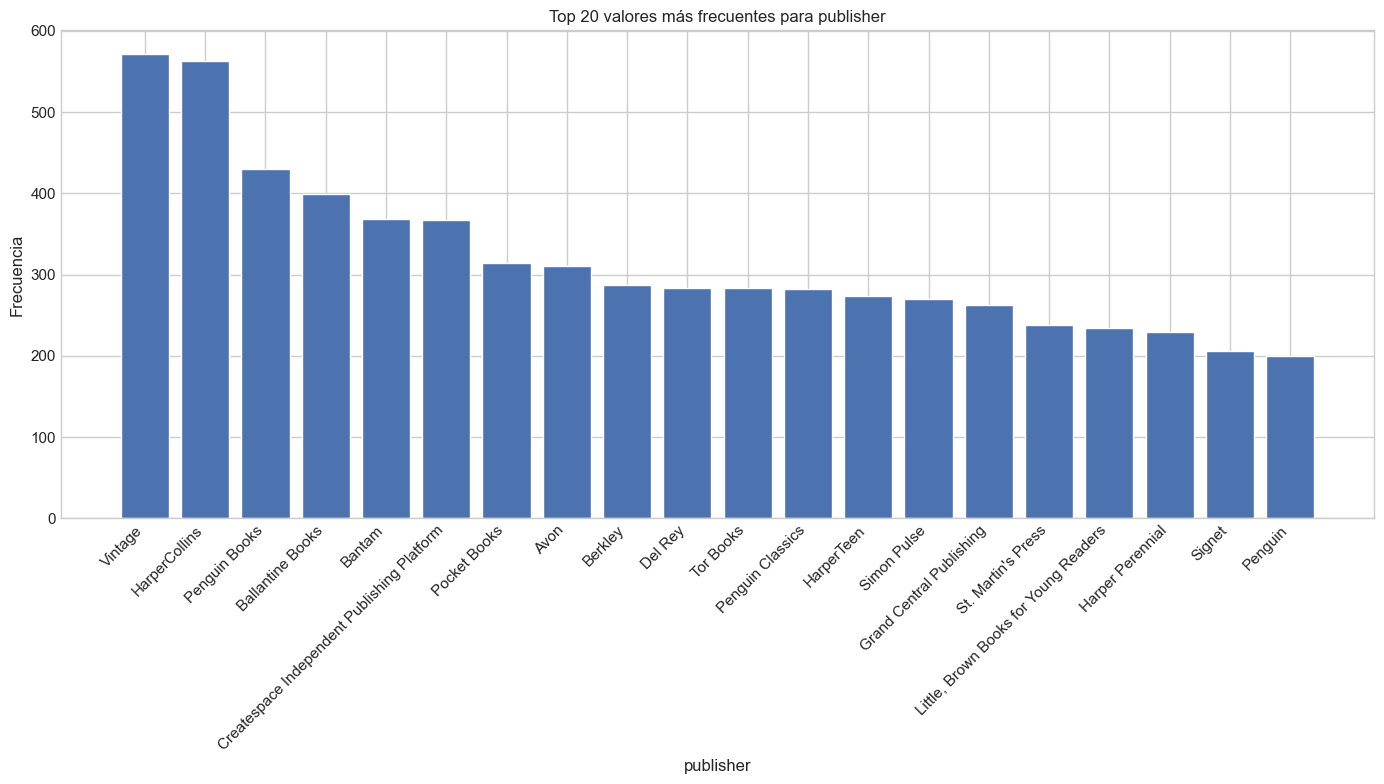

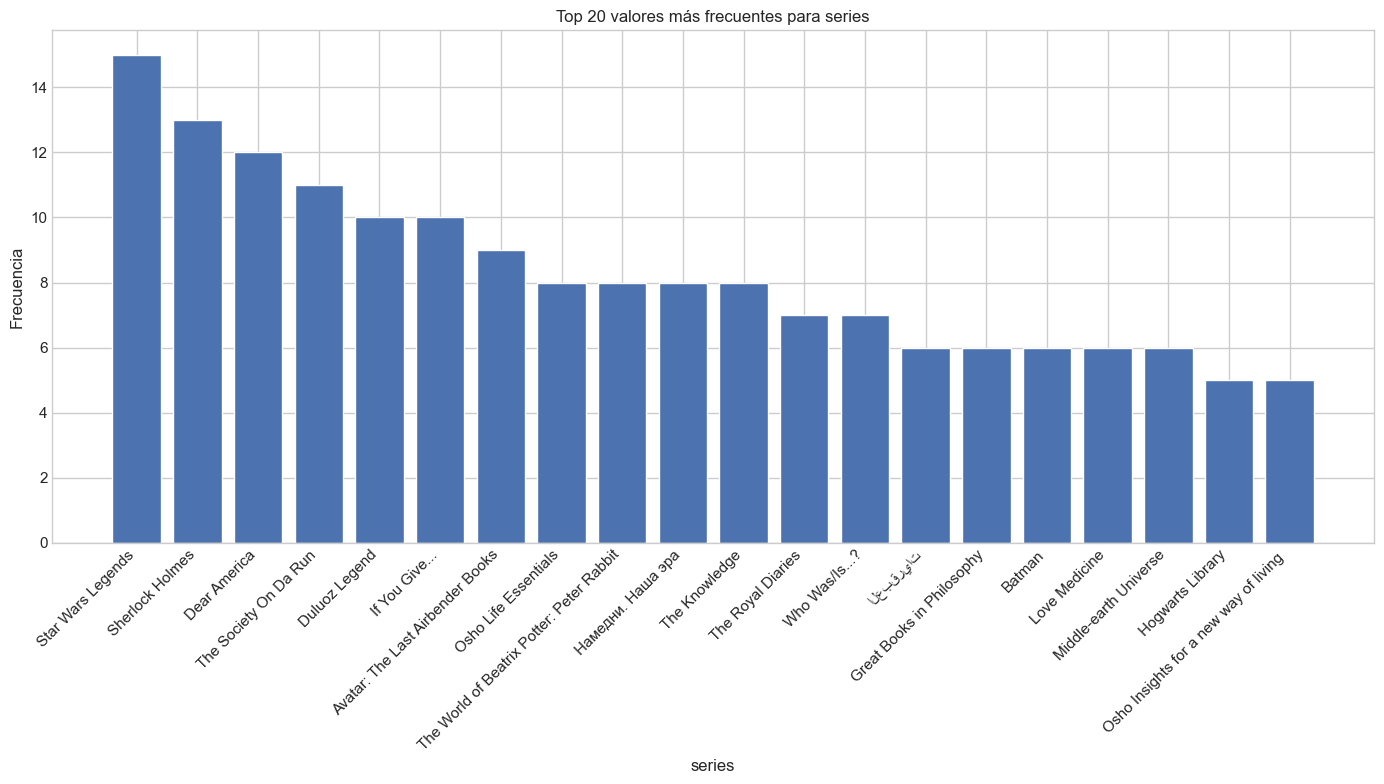

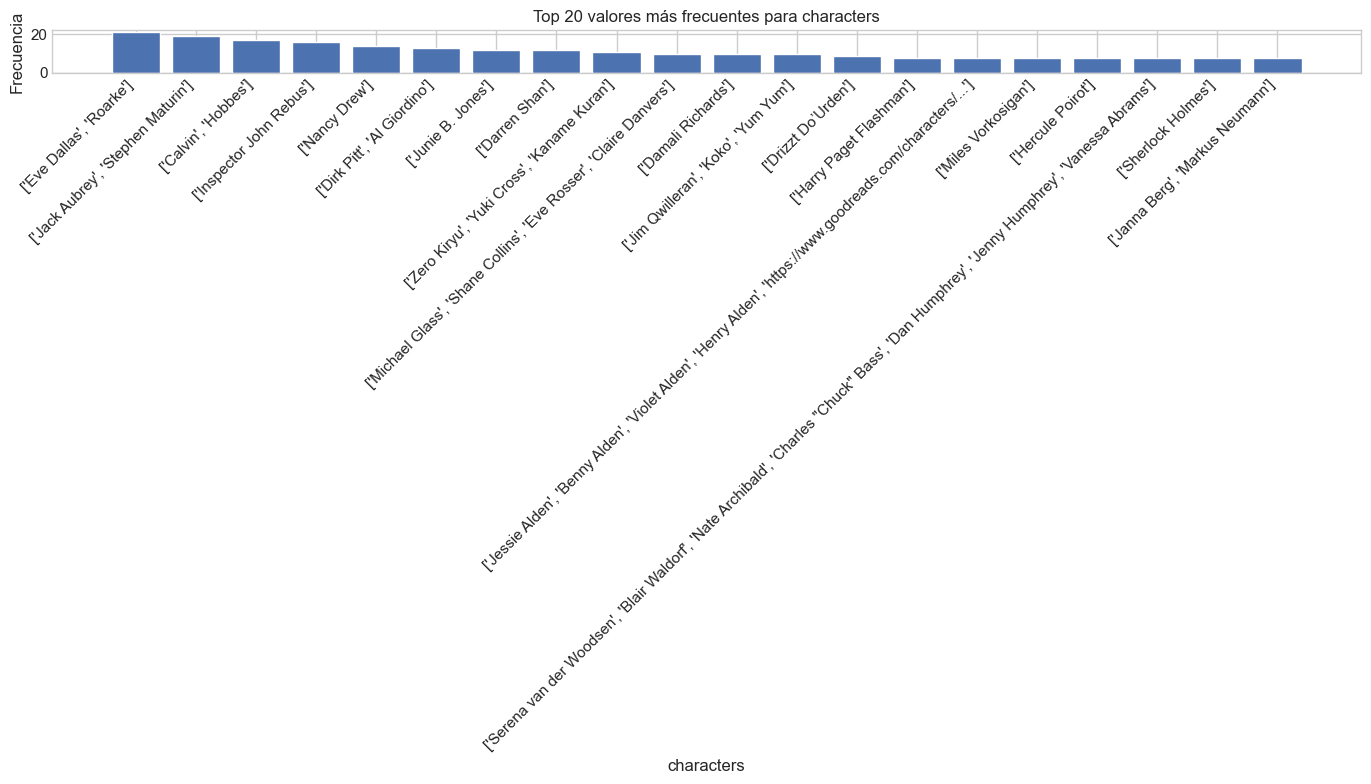

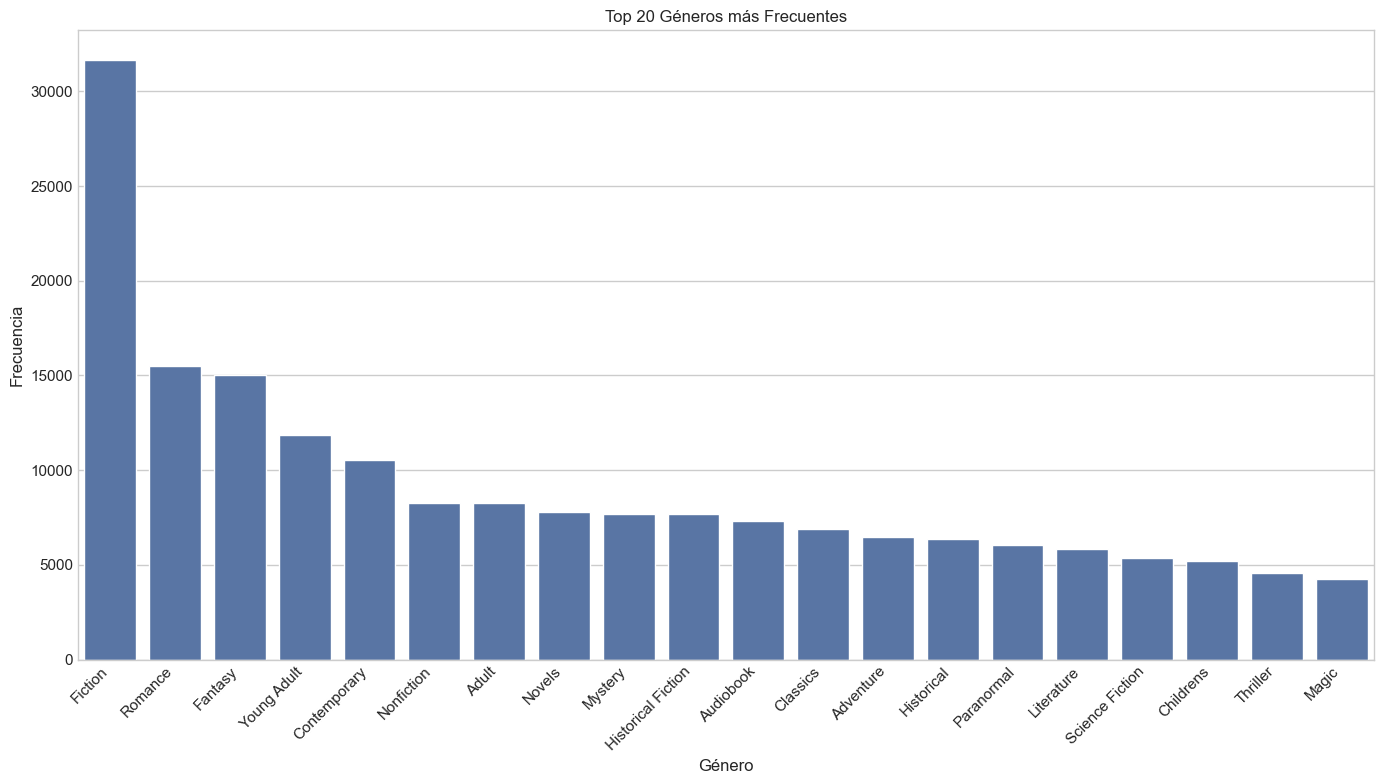

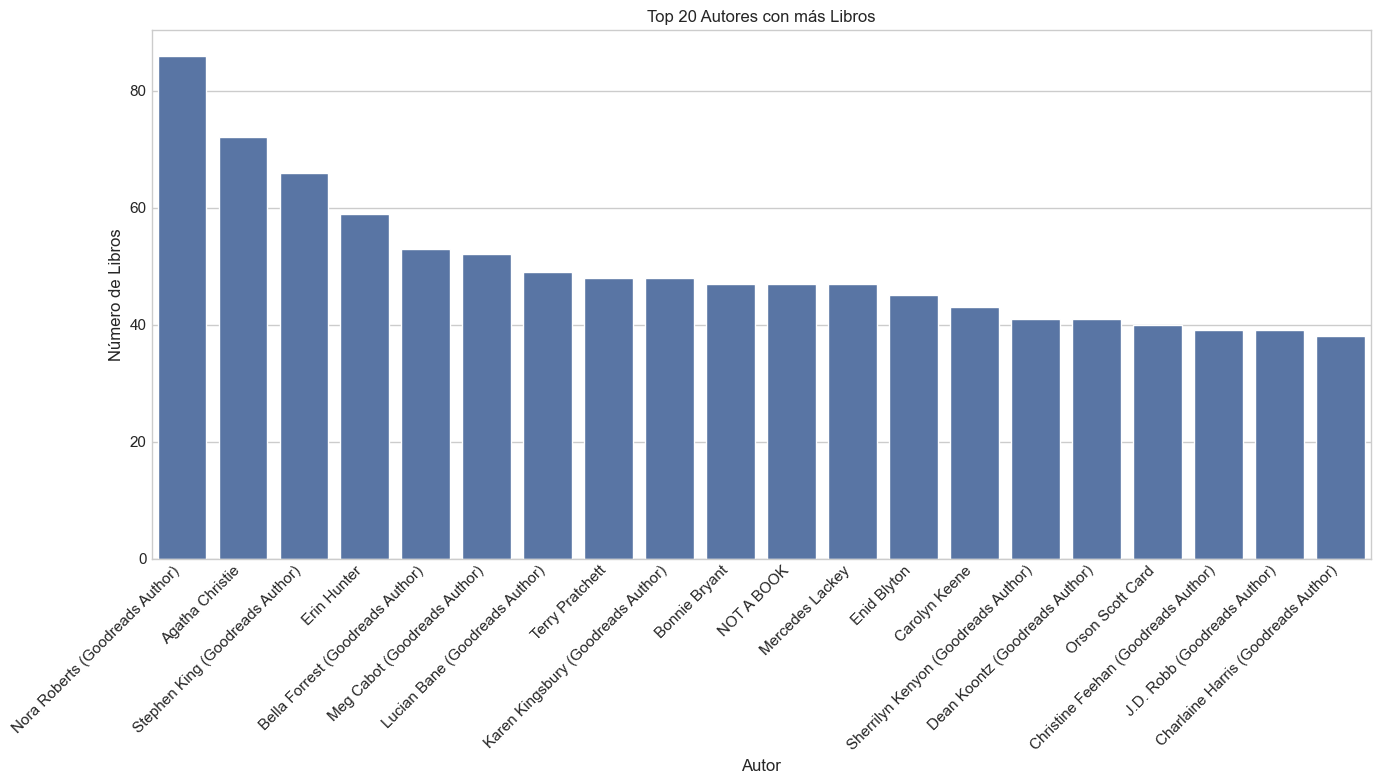

In [48]:
# Lista de variables categóricas
categorical_vars = ['language', 'bookformat', 'publisher', 'series', 'characters']

# Verificar que las columnas existen
valid_categorical_vars = [var for var in categorical_vars if var in books.columns]

if not valid_categorical_vars:
    print("No se encontraron variables categóricas válidas")
else:
    # 1. Gráficos de barras para variables categóricas
    for var in valid_categorical_vars:
        plt.figure(figsize=(14, 8))
        
        # Obtener los 20 valores más frecuentes, excluyendo valores nulos
        value_counts = books[var].dropna().value_counts().head(20)
        
        if len(value_counts) > 0:
            # Usar matplotlib directamente para tener control total
            plt.bar(range(len(value_counts)), value_counts.values)
            
            # Configurar las etiquetas del eje x con los nombres exactos
            plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
            
            plt.title(f'Top 20 valores más frecuentes para {var}')
            plt.xlabel(var)
            plt.ylabel('Frecuencia')
            plt.tight_layout()
            plt.savefig(os.path.join(images_dir, f'barplot_{var}.png'))
            plt.show()
        else:
            print(f"No hay datos suficientes para visualizar la variable '{var}'")

# 2. Análisis de géneros (con manejo de errores mejorado)
if 'genres' in books.columns:
    all_genres = []
    for genres_list in books['genres'].dropna():
        try:
            # Convertir la cadena de texto a lista
            if isinstance(genres_list, str):
                genres = eval(genres_list)
                if isinstance(genres, list):
                    all_genres.extend(genres)
        except:
            continue
    
    if all_genres:
        # Contar frecuencia de cada género
        genre_counts = pd.Series(all_genres).value_counts().head(20)
        
        plt.figure(figsize=(14, 8))
        sns.barplot(x=genre_counts.index, y=genre_counts.values)
        plt.title('Top 20 Géneros más Frecuentes')
        plt.xlabel('Género')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(images_dir, 'barplot_genres.png'))
        plt.show()
    else:
        print("No se pudieron extraer géneros del dataset")
else:
    print("La columna 'genres' no existe en el dataset")

# 3. Análisis de autores más frecuentes
if 'author' in books.columns:
    author_counts = books['author'].dropna().value_counts().head(20)
    
    if len(author_counts) > 0:
        plt.figure(figsize=(14, 8))
        sns.barplot(x=author_counts.index, y=author_counts.values)
        plt.title('Top 20 Autores con más Libros')
        plt.xlabel('Autor')
        plt.ylabel('Número de Libros')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(images_dir, 'barplot_authors.png'))
        plt.show()
    else:
        print("No hay datos suficientes de autores para visualizar")
else:
    print("La columna 'author' no existe en el dataset")

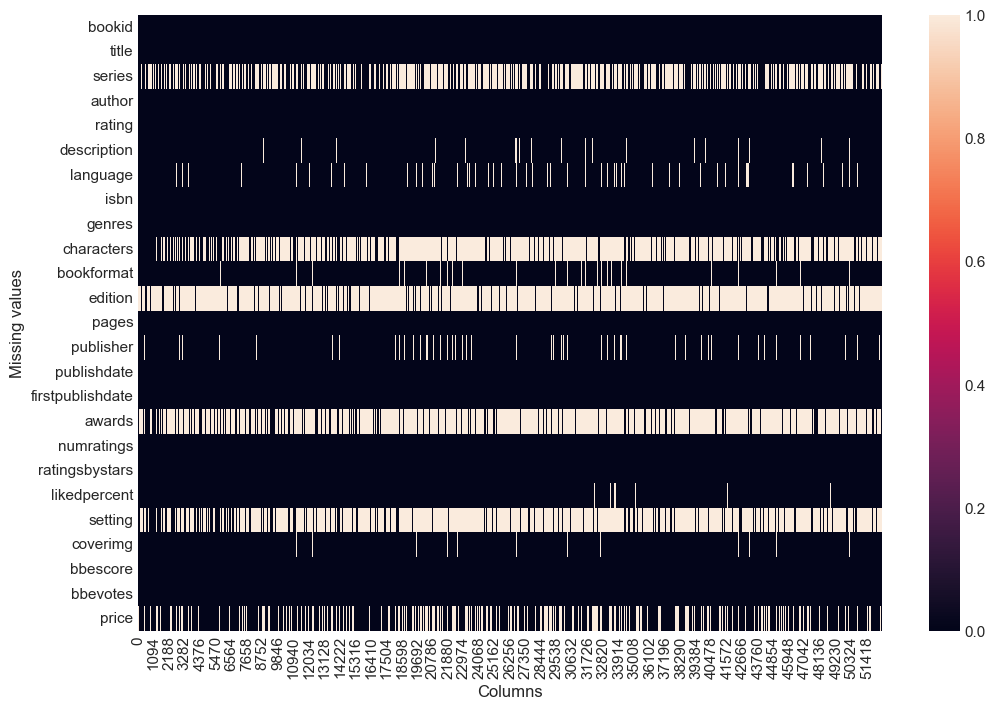

In [49]:
#Heatmap of missing values to see which columns have the most missing values
#This is useful to know which columns to drop or impute and if there are any patterns in the missing values
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [50]:
# Dropping columns

# that has too many missing values and will not be useful for the analysis
books = books.drop(['edition', 'firstpublishdate'], axis=1)
books.columns.tolist()

['bookid',
 'title',
 'series',
 'author',
 'rating',
 'description',
 'language',
 'isbn',
 'genres',
 'characters',
 'bookformat',
 'pages',
 'publisher',
 'publishdate',
 'awards',
 'numratings',
 'ratingsbystars',
 'likedpercent',
 'setting',
 'coverimg',
 'bbescore',
 'bbevotes',
 'price']

In [51]:
# Dealing with numerical columns with faster methods

# Pages column

#In pages column we replace the missing values and 0 valueswith the median of the column
mediana_pages = books.loc[(books['pages'].notna()) & (books['pages'] > 0), 'pages'].median()
books['pages'] = books['pages'].fillna(mediana_pages)
books.loc[books['pages'] == 0, 'pages'] = mediana_pages


# likedpercent column

#In likedpercent column we replace the missing values with the median of the column
mediana_likedpercent = books.loc[(books['likedpercent'].notna()) & (books['likedpercent'] > 0), 'likedpercent'].median()
books['likedpercent'] = books['likedpercent'].fillna(mediana_likedpercent)
books.loc[books['likedpercent'] == 0, 'likedpercent'] = mediana_likedpercent

In [52]:
# Dealing with text columns with faster methods

# Reemplazar valores nulos en columnas de texto con mensaje informativo
text_columns_to_fill = ['series', 'characters', 'awards', 'setting', 'coverimg', 'publisher', 'language']
fill_values = {
    'series': 'Not part of a series',
    'characters': 'Unknown',
    'awards': '[]',
    'setting': 'Unknown',
    'coverimg': 'No cover available',
    'publisher': 'Unknown',
    'language': 'English'
}

for col in text_columns_to_fill:
    books[col] = books[col].fillna(fill_values[col])

In [53]:
# Bookformat column

books['bookformat'] = books['bookformat'].fillna('Paperback')

# Contamos la frecuencia de cada formato de libro
format_counts = books['bookformat'].value_counts()

# Identificamos los formatos con frecuencia menor a 500
low_frequency_formats = format_counts[format_counts < 500].index.tolist()

print(f"Formatos con frecuencia menor a 500 (serán eliminados):")
for fmt in low_frequency_formats:
    print(f"- {fmt}: {format_counts[fmt]} libros")

# Número de libros antes de la eliminación
n_before = len(books)

# Filtramos el DataFrame para mantener solo los formatos con frecuencia >= 500
books = books[~books['bookformat'].isin(low_frequency_formats)]

# Número de libros después de la eliminación
n_after = len(books)

print(f"\nSe eliminaron {n_before - n_after} libros ({((n_before - n_after) / n_before * 100):.2f}%)")

Formatos con frecuencia menor a 500 (serán eliminados):
- Audio CD: 145 libros
- Nook: 138 libros
- Audiobook: 106 libros
- Unknown Binding: 100 libros
- Trade Paperback: 53 libros
- Audio Cassette: 35 libros
- Library Binding: 35 libros
- Audible Audio: 33 libros
- paperback: 31 libros
- Board Book: 20 libros
- Leather Bound: 20 libros
- Comics: 17 libros
- Board book: 17 libros
- Audio: 16 libros
- Boxed Set: 10 libros
- hardcover: 10 libros
- Mass Market: 8 libros
- Broché: 8 libros
- Taschenbuch: 7 libros
- Perfect Paperback: 7 libros
- Hardback: 7 libros
- Graphic Novels: 7 libros
- paper: 7 libros
- Online: 6 libros
- Capa dura: 6 libros
- Spiral-bound: 5 libros
- MP3 CD: 5 libros
- cloth: 5 libros
- Slipcased Hardcover: 5 libros
- Capa comum: 4 libros
- Klappenbroschur: 4 libros
- Pasta dura: 4 libros
- Poche: 4 libros
- Pasta blanda: 3 libros
- Unbound: 3 libros
- Paperback : 3 libros
- mass_market: 3 libros
- eBook Kindle: 3 libros
- Wattpad: 3 libros
- Box Set: 3 libros
- Bro

In [54]:
# Price column

# We use this to convert the price column to a float
books['price'] = pd.to_numeric(books['price'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
books['price']


0         5.09
1         7.38
2          NaN
3          NaN
4         2.10
         ...  
52472    19.18
52474      NaN
52475     7.37
52476     2.86
52477     5.20
Name: price, Length: 51462, dtype: float64

In [55]:
null_percentage = books['price'].isna().mean() * 100
null_percentage

np.float64(27.060743849830942)

In [56]:
price_stats = books['price'].describe()
price_stats

count    37536.000000
mean         9.552155
std         24.116633
min          0.840000
25%          3.220000
50%          5.200000
75%          8.772500
max        898.640000
Name: price, dtype: float64

Estadísticas descriptivas de los precios:
count    37536.000000
mean         9.552155
std         24.116633
min          0.840000
25%          3.220000
50%          5.200000
75%          8.772500
max        898.640000
Name: price, dtype: float64


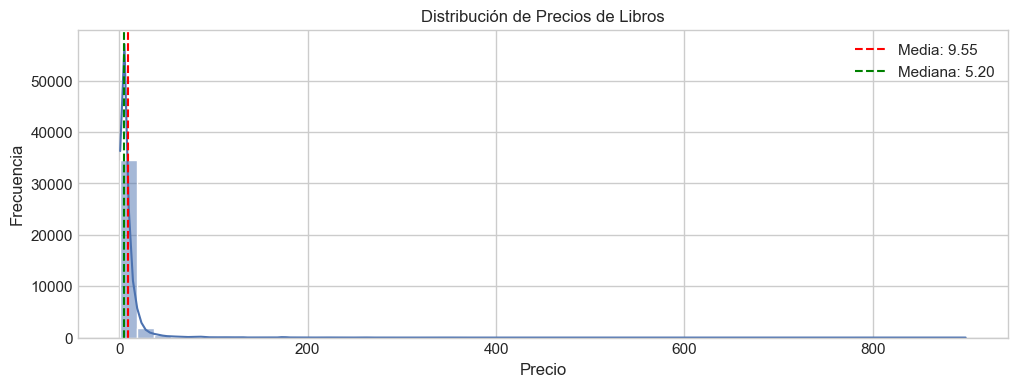

In [57]:
# Estadísticas descriptivas de la columna price
price_stats = books['price'].describe()
print("Estadísticas descriptivas de los precios:")
print(price_stats)

# Visualizar la distribución de precios
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.histplot(books['price'].dropna(), bins=50, kde=True)
plt.title('Distribución de Precios de Libros')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.axvline(books['price'].mean(), color='red', linestyle='--', label=f'Media: {books["price"].mean():.2f}')
plt.axvline(books['price'].median(), color='green', linestyle='--', label=f'Mediana: {books["price"].median():.2f}')
plt.legend()
plt.show()

In [58]:
# 1. Imputation with the median (less sensitive to outliers)
books['price'] = books['price'].fillna(books['price'].median())
books['price']

# This could be any other good option to impute the price through assuming that the price is related to the book format
#if 'bookformat' in books.columns:
    #median_by_format = books.groupby('bookformat')['price'].median()
    #books_imputed['price_by_format'] = books.apply(
        #lambda x: median_by_format.get(x['bookformat'])
        #if pd.isna(x['price']) else x['price'], axis=1)

0         5.09
1         7.38
2         5.20
3         5.20
4         2.10
         ...  
52472    19.18
52474     5.20
52475     7.37
52476     2.86
52477     5.20
Name: price, Length: 51462, dtype: float64

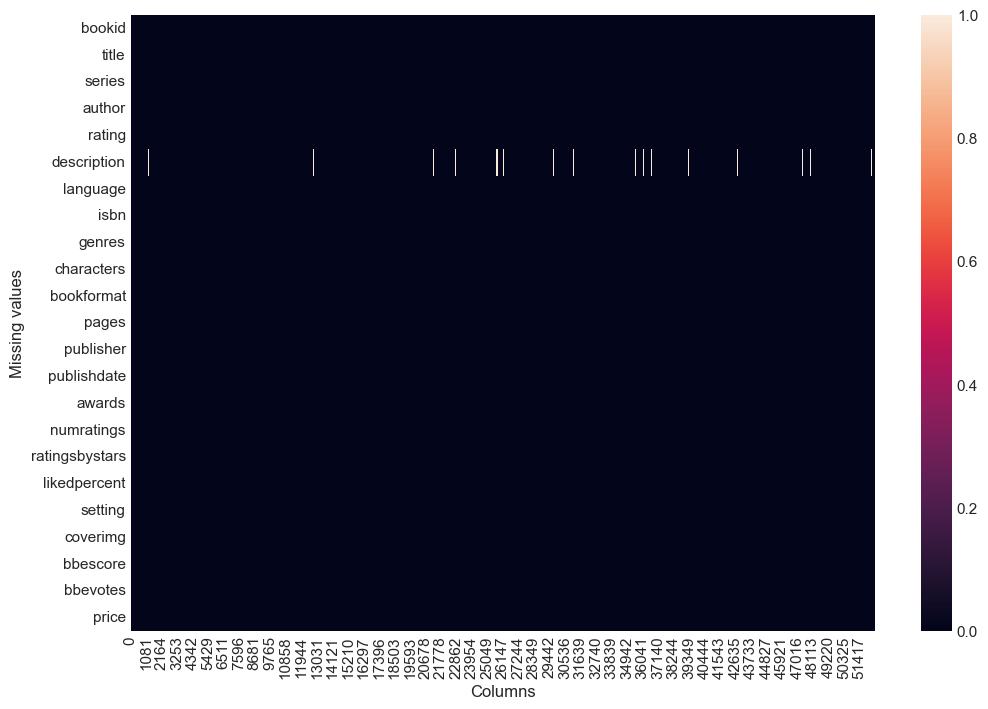

In [59]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

Checking duplicates in ISBN and title
First we quit ISBN duplicated because is unique, but they can have same title

In [60]:
# ISBN column

# Análisis de valores únicos en la columna isbn
valores_unicos = books['isbn'].nunique()
total_registros = len(books)
duplicados = total_registros - valores_unicos

print(f"Total de registros: {total_registros}")
print(f"Valores únicos de ISBN: {valores_unicos}")
print(f"Número de registros duplicados: {duplicados}")

# Obtener la distribución de frecuencias de los valores de isbn
distribucion_isbn = books['isbn'].value_counts()

# Mostrar cuántos ISBNs aparecen más de una vez
isbn_repetidos = distribucion_isbn[distribucion_isbn > 1]
print(f"\nNúmero de ISBNs que aparecen más de una vez: {len(isbn_repetidos)}")

# Mostrar los ISBNs más repetidos
print("\nLos ISBNs más repetidos:")
print(isbn_repetidos.head(10))

# Verificar el ISBN sospechoso
print(f"\nEl ISBN '9999999999999' aparece {distribucion_isbn.get('9999999999999', 0)} veces")

# Identificar los ISBNs duplicados genuinos (excluyendo el valor predeterminado)
isbn_duplicados_genuinos = isbn_repetidos[isbn_repetidos.index != '9999999999999']
print(f"\nNúmero de ISBNs duplicados genuinos: {len(isbn_duplicados_genuinos)}")

# Solución recomendada
books_final = books.copy()

# Generar IDs únicos para los libros con ISBN predeterminado
mask_default = books_final['isbn'] == '9999999999999'
books_final.loc[mask_default, 'isbn'] = 'NO_ISBN_' + books_final.loc[mask_default].index.astype(str)

# Identificar registros con ISBNs duplicados genuinos
mask_duplicados = books_final['isbn'].isin(isbn_duplicados_genuinos.index)

# Para los ISBNs duplicados genuinos, quedarnos solo con el primero
books = books_final.drop_duplicates(subset=['isbn'], keep='first')

print(f"Registros con ISBN predeterminado: {mask_default.sum()}")
print(f"Registros con ISBN duplicado genuino: {mask_duplicados.sum()}")
print(f"Registros eliminados por ser duplicados: {len(books_final) - len(books)}")
print(f"Total de registros después del procesamiento: {len(books)}")

Total de registros: 51462
Valores únicos de ISBN: 47165
Número de registros duplicados: 4297

Número de ISBNs que aparecen más de una vez: 53

Los ISBNs más repetidos:
isbn
9999999999999    4246
9780765326355       2
9780312429980       2
9780764208096       2
B00O84Q7UG          2
9783867196727       2
9500704919          2
9788402067074       2
9788423331970       2
9781855166752       2
Name: count, dtype: int64

El ISBN '9999999999999' aparece 4246 veces

Número de ISBNs duplicados genuinos: 52
Registros con ISBN predeterminado: 4246
Registros con ISBN duplicado genuino: 104
Registros eliminados por ser duplicados: 52
Total de registros después del procesamiento: 51410


In [61]:
# titles column

# Análisis of duplicates in titles
titulos_duplicados = books['title'].duplicated(keep=False)
print(f"Número de libros con títulos duplicados: {titulos_duplicados.sum()}")

# Identificar grupos de libros con el mismo título
grupos_titulos = books[titulos_duplicados].groupby('title')
print(f"Número de títulos duplicados únicos: {len(grupos_titulos)}")

# Mostrar algunos ejemplos de títulos duplicados
print("\nEjemplos de títulos duplicados:")
for titulo, grupo in list(grupos_titulos)[:5]:  # Mostrar los primeros 5 grupos
    print(f"\nTítulo: '{titulo}' - {len(grupo)} ocurrencias")
    print(grupo[['isbn', 'author', 'publisher']].head())

# Identificar libros con mismo título pero diferente ISBN
mismo_titulo_diferente_isbn = books[titulos_duplicados].copy()
mismo_titulo_diferente_isbn['isbn_duplicado'] = mismo_titulo_diferente_isbn.duplicated(subset=['title', 'isbn'], keep=False)

# Contar cuántos tienen el mismo título y mismo ISBN
mismo_titulo_mismo_isbn = mismo_titulo_diferente_isbn[mismo_titulo_diferente_isbn['isbn_duplicado']]
print(f"\nLibros con mismo título y mismo ISBN: {len(mismo_titulo_mismo_isbn)}")

# Eliminar duplicados de título+ISBN (manteniendo el primero)
books_limpio = books.copy()
duplicados_a_eliminar = books_limpio.duplicated(subset=['title', 'isbn'], keep='first')
books_limpio = books_limpio[~duplicados_a_eliminar].copy()

print(f"\nRegistros originales: {len(books)}")
print(f"Registros después de eliminar duplicados de título+ISBN: {len(books_limpio)}")
print(f"Registros eliminados: {len(books) - len(books_limpio)}")

# Actualizar la variable books
books = books_limpio.copy()

# Verificar que no quedan duplicados de título+ISBN
duplicados_restantes = books.duplicated(subset=['title', 'isbn'], keep=False)
print(f"Duplicados de título+ISBN restantes: {duplicados_restantes.sum()}")

# Verificar cuántos títulos duplicados quedan (con diferentes ISBNs)
titulos_duplicados_restantes = books['title'].duplicated(keep=False)
print(f"Títulos duplicados restantes (con diferentes ISBNs): {titulos_duplicados_restantes.sum()}")

Número de libros con títulos duplicados: 3993
Número de títulos duplicados únicos: 1570

Ejemplos de títulos duplicados:

Título: ''Salem's Lot' - 2 ocurrencias
               isbn                                             author  \
385   9780450031069                    Stephen King (Goodreads Author)   
3674  9780385516488  Stephen King (Goodreads Author), Jerry N. Uels...   

                publisher  
385   New English Library  
3674            Doubleday  

Título: ''Til Death' - 2 ocurrencias
                isbn                          author       publisher
27557  9781416589884       Miasha (Goodreads Author)      Touchstone
48062  9780778314271  Sharon Sala (Goodreads Author)  Harlequin MIRA

Título: '1919' - 3 ocurrencias
                isbn                                        author  \
10578  9789770932926                  أحمد مراد (Goodreads Author)   
11569  9780618056828  John Dos Passos, E.L. Doctorow (Foreword by)   
32466  NO_ISBN_32466                         

In [62]:
books

bookid                                      title  \
0           0                           The Hunger Games   
1           0  Harry Potter and the Order of the Phoenix   
2           0                      To Kill a Mockingbird   
3           0                        Pride and Prejudice   
4           0                                   Twilight   
...       ...                                        ...   
52472       0                               Unbelievable   
52474       0                                    Anasazi   
52475       0                                     Marked   
52476       0                                Wayward Son   
52477       0                        Daughter of Helaman   

                      series  \
0        The Hunger Games #1   
1            Harry Potter #5   
2      To Kill a Mockingbird   
3       Not part of a series   
4       The Twilight Saga #1   
...                      ...   
52472           Port Fare #2   
52474      Sense of Truth #2   
52475      Soul Guardians #1   
52476   Not part of a series   
52477   Stripling Warrior #1   

                                                  author  rating  \
0                                        Suzanne Collins    4.33   
1              J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                             Harper Lee    4.28   
3              Jane Austen, Anna Quindlen (Introduction)    4.26   
4                                        Stephenie Meyer    3.60   
...                                                  ...     ...   
52472                   Sherry Gammon (Goodreads Author)    4.16   
52474                                      Emma Michaels    4.19   
52475                  Kim Richardson (Goodreads Author)    3.70   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   
52477                    Misty Moncur (Goodreads Author)    4.02   

                                             description language  \
0      WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   
1      There is a door at the end of a silent corrido...  English   
2      The unforgettable novel of a childhood in a sl...  English   
3      Alternate cover edition of ISBN 9780679783268S...  English   
4      About three things I was absolutely positive.\...  English   
...                                                  ...      ...   
52472  Lilah Lopez Dreser's in town to take care of u...  English   
52474  'Anasazi', sequel to 'The Thirteenth Chime' by...  English   
52475  --READERS FAVORITE AWARDS WINNER 2011--Sixteen...  English   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...  English   
52477  Fighting in Helaman's army is Keturah's deepes...  English   

                isbn                                             genres  \
0      9780439023481  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1      9780439358071  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2          NO_ISBN_2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3          NO_ISBN_3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4      9780316015844  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   
...              ...                                                ...   
52472  9781477594247  ['Romance', 'Young Adult', 'Contemporary', 'Co...   
52474  NO_ISBN_52474                         ['Mystery', 'Young Adult']   
52475  9781461017097  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...   
52476  9781450755634  ['Fiction', 'Mystery', 'Historical Fiction', '...   
52477  9781599554976  ['Lds Fiction', 'Historical Fiction', 'Young A...   

                                              characters bookformat  pages  \
0      ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  Hardcover    374   
1      ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  Paperback    870   
2      ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  Paperback    324   
3      ['Mr. Bennet', 'Mrs. Bennet', 'Jane

In [63]:
# awards column

def count_awards(awards_str):
    if not awards_str or awards_str == "":
        return 0
    awards_list = eval(awards_str)
    return len(awards_list)
    
    
books['num_awards'] = books['awards'].apply(count_awards)


#splitting awards and creating a list of individual awards
awards_list = books['awards'].str.split(',').explode().str.strip()

#grouping by book and counting awards
books_with_awards = awards_list.groupby(awards_list).size().reset_index(name='num_awards')
books_most_awards = books_with_awards.nlargest(10, 'num_awards')
books_most_awards_details = pd.merge(books_most_awards, books[['title', 'awards']], left_on='awards', right_on='awards', how='left')
print("Books with the Most Awards:")
print(books_most_awards_details[['title', 'num_awards']])


#aggregate by author
authors_with_awards = books.groupby('author')['awards'].apply(lambda x: x.str.split(',').explode().str.strip().count()).reset_index(name='num_awards')
authors_most_awards = authors_with_awards.nlargest(10, 'num_awards')
print("\nAuthors with the Most Awards:")
print(authors_most_awards)

Books with the Most Awards:
                                                   title  num_awards
0                                    Pride and Prejudice       40961
1                               The Chronicles of Narnia       40961
2      J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...       40961
3                   The Hitchhiker's Guide to the Galaxy       40961
4                                        The Giving Tree       40961
...                                                  ...         ...
41018                                       Bruidsvlucht          14
41019                      Der Geschmack von Apfelkernen          14
41020                            The Garden of Last Days          14
41021  Pocket Atlas of Remote Islands: Fifty Islands ...          14
41022                                                NaN          12

[41023 rows x 2 columns]

Authors with the Most Awards:
                                          author  num_awards
24063            Stephen K

In [64]:
#First (after many tests) let's make sure all values are treated as strings and replace None with '[]' 
books['ratingsbystars'] = books['ratingsbystars'].apply(lambda x: str(x) if x is not None else '[]')

#Then remove the square brackets and split the string into a list of ratings
books['ratingsbystars'] = books['ratingsbystars'].str.strip('[]').str.replace("'", "").str.split(',')

#Changing empty strings or None with '0'
books['ratingsbystars'] = books['ratingsbystars'].apply(lambda x: ['0' if elem.strip() == '' else elem.strip() for elem in x])

#Each list has to have 5 elements (5 ratings)
books['ratingsbystars'] = books['ratingsbystars'].apply(lambda x: x + ['0'] * (5 - len(x)) if len(x) < 5 else x)

#Creating new columns
ratings_df = pd.DataFrame(books['ratingsbystars'].tolist(), index=books.index, columns=['5_star', '4_star', '3_star', '2_star', '1_star'])

#Changing type!
ratings_df = ratings_df.astype(int)

#Merge the new columns back
books = books.drop(columns=['ratingsbystars'])
books = pd.concat([books, ratings_df], axis=1)

numeric_vars.append(['5_star', '4_star', '3_star', '2_star', '1_star'])

print(books.dtypes)

bookid                   int32
title                   object
series                  object
author                  object
rating                 float32
description             object
language              category
isbn                    object
genres                category
characters              object
bookformat            category
pages                    int32
publisher               object
publishdate     datetime64[ns]
awards                  object
numratings               int32
likedpercent           float32
setting                 object
coverimg                object
bbescore               float32
bbevotes                 int32
price                  float64
num_awards               int64
5_star                   int64
4_star                   int64
3_star                   int64
2_star                   int64
1_star                   int64
dtype: object


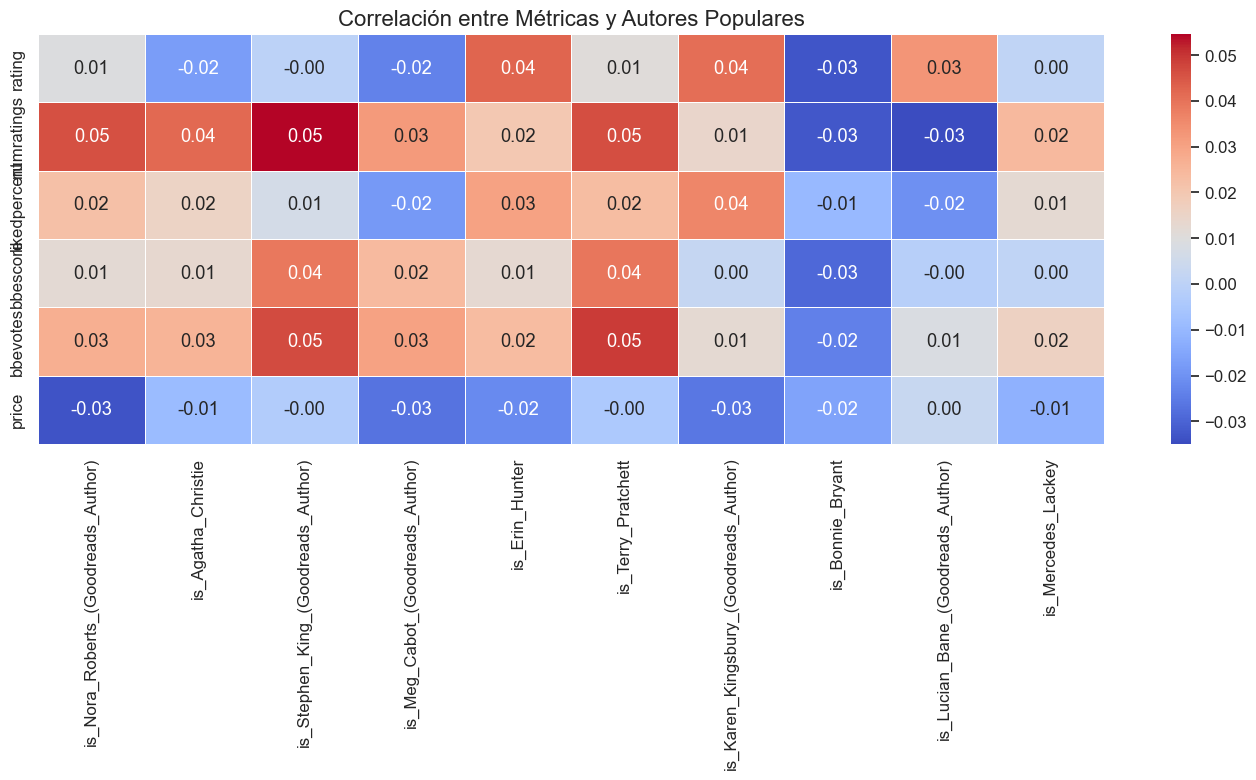

In [80]:
# Identificar los 10 autores más populares
top_authors = books['author'].value_counts().head(10).index

# Crear variables dummy para estos autores
for author in top_authors:
    books[f'is_{author.replace(" ", "_")}'] = (books['author'] == author).astype(int)

# Incluir estas variables dummy en el análisis de correlación
author_columns = [f'is_{author.replace(" ", "_")}' for author in top_authors]
variables_para_correlacion = ['rating', 'numratings', 'likedpercent', 'bbescore', 
                              'bbevotes', 'price'] + author_columns

df_corr = books[variables_para_correlacion].copy()
correlation_matrix = df_corr.corr(method='spearman')

# Visualizar solo las correlaciones entre métricas y autores
author_correlations = correlation_matrix.loc[['rating', 'numratings', 'likedpercent', 
                                             'bbescore', 'bbevotes', 'price'], author_columns]

plt.figure(figsize=(14, 8))
sns.heatmap(author_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre Métricas y Autores Populares', fontsize=16)
plt.tight_layout()
plt.savefig('images/author_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

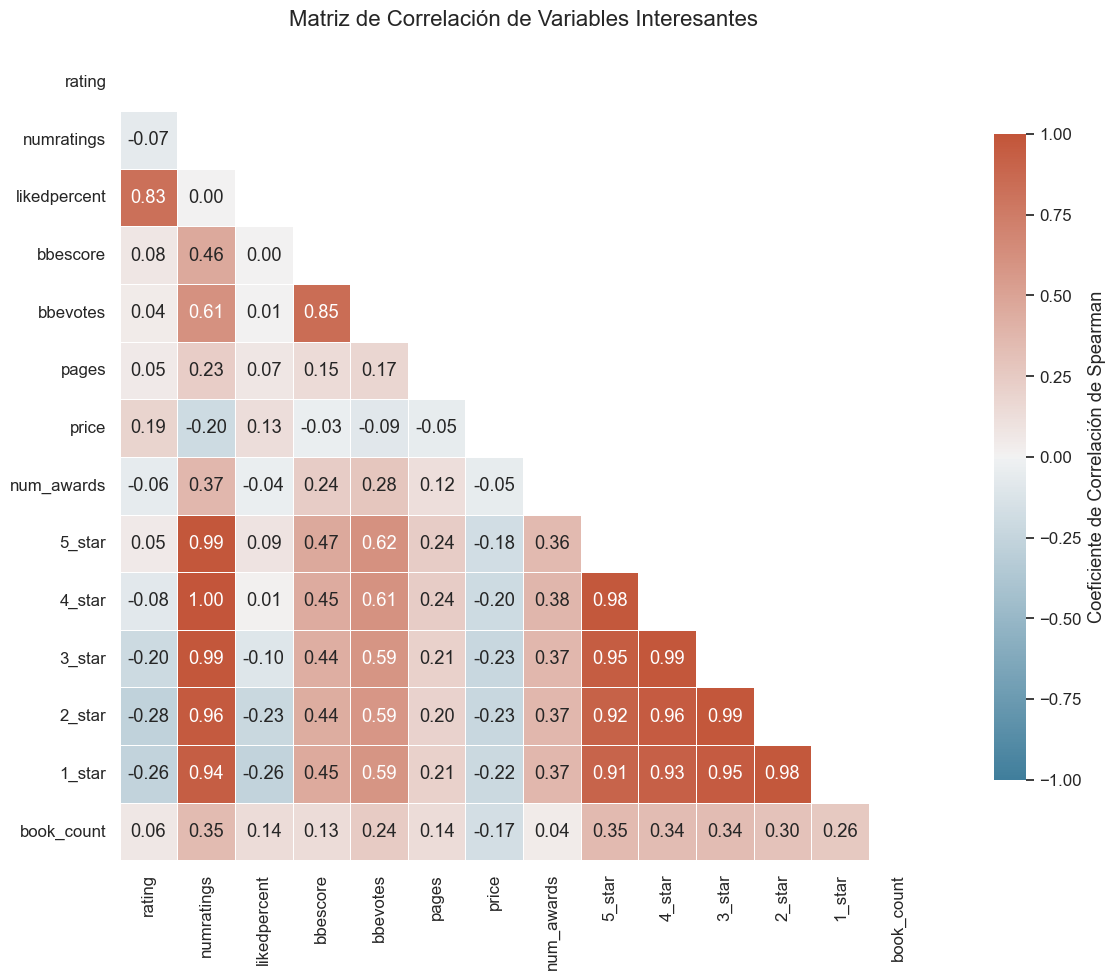

Las 10 correlaciones más fuertes:
     Variable 1 Variable 2  Correlación  Abs_Correlación
23   numratings     4_star     0.996677         0.996677
22   numratings     5_star     0.988108         0.988108
136      4_star     3_star     0.986483         0.986483
151      3_star     2_star     0.985852         0.985852
24   numratings     3_star     0.985391         0.985391
121      5_star     4_star     0.980536         0.980536
166      2_star     1_star     0.978385         0.978385
25   numratings     2_star     0.962373         0.962373
137      4_star     2_star     0.958575         0.958575
152      3_star     1_star     0.953629         0.953629


In [ ]:
# Correlation interesting columns with RATINGS column and NUMBER OF BOOKS

variables_interesantes = [
    'rating', 'numratings', 'likedpercent', 'bbescore', 'bbevotes',
    'pages', 'price', 'num_awards', '5_star', '4_star', '3_star', '2_star', '1_star'
]

# We want to check if there is a correlation between the number of books per author and the ratings
author_counts = books['author'].value_counts().reset_index()
author_counts.columns = ['author', 'book_count']

# Hacemos el merge pero solo seleccionamos las columnas numéricas + book_count
books_with_count = books.merge(author_counts, on='author', how='left')
variables_con_autor = variables_interesantes + ['book_count']

# Creamos un DataFrame con solo estas variables numéricas
df_corr = books_with_count[variables_con_autor].copy()

# Calculamos la matriz de correlación usando el método de Spearman
correlation_matrix = df_corr.corr(method='spearman')

# Configuramos el estilo para una visualización más atractiva
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.1)
sns.set_style("white")

# Creamos una máscara para el triángulo superior (para evitar redundancia)
mask = np.triu(correlation_matrix)

# Generamos el mapa de calor con una paleta más atractiva
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creamos el heatmap
heatmap = sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True,                  # Mostrar valores
    fmt=".2f",                   # Formato de dos decimales
    cmap=cmap,                   # Paleta de colores
    vmin=-1, vmax=1,             # Rango de valores
    square=True,                 # Celdas cuadradas
    linewidths=.5,               # Ancho de líneas entre celdas
    cbar_kws={"shrink": .8, "label": "Coeficiente de Correlación de Spearman"}
)

# Añadimos título y ajustamos diseño
plt.title('Matriz de Correlación de Variables Interesantes', fontsize=16, pad=20)
plt.tight_layout()

# Guardamos la imagen
plt.savefig('images/correlation_matrix_interesting.png', dpi=300, bbox_inches='tight')

# Mostramos el gráfico
plt.show()

# Identificamos las correlaciones más fuertes (positivas y negativas)
# Convertimos la matriz a un DataFrame para facilitar el análisis
corr_df = correlation_matrix.unstack().reset_index()
corr_df.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Eliminamos autocorrelaciones y duplicados
corr_df = corr_df[corr_df['Variable 1'] != corr_df['Variable 2']]
corr_df = corr_df.drop_duplicates(['Correlación'])

# Ordenamos por valor absoluto de correlación
corr_df['Abs_Correlación'] = corr_df['Correlación'].abs()
corr_df = corr_df.sort_values('Abs_Correlación', ascending=False)

# Mostramos las 10 correlaciones más fuertes
print("Las 10 correlaciones más fuertes:")
print(corr_df.head(10))

In [66]:
# genres column

# Primero, veamos cómo se ve la columna actualmente
print("Ejemplo de la columna 'genres':")
print(books['genres'].head())

# Convertir la columna de categoría a string primero
genres_str = books['genres'].astype(str)

# Ahora procesamos los strings para extraer las listas
# Eliminamos los caracteres '[' y ']' y dividimos por comas
books['genres_list'] = genres_str.apply(
    lambda x: [g.strip().strip("'\"") for g in x.strip("[]").split(",")] if x != "[]" else []
)

# Veamos cuántos géneros únicos hay
all_genres = []
for genres in books['genres_list']:
    # Filtramos strings vacíos que puedan haber quedado
    valid_genres = [g for g in genres if g and len(g) > 1]
    all_genres.extend(valid_genres)
    
unique_genres = set(all_genres)
print(f"Número de géneros únicos: {len(unique_genres)}")

# Veamos los géneros más comunes
from collections import Counter
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(20)
print("\nLos 20 géneros más comunes:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

# Seleccionamos los géneros más comunes (por ejemplo, los que aparecen al menos 1000 veces)
min_count = 1000
common_genres = [genre for genre, count in genre_counts.items() if count >= min_count]
print(f"\nNúmero de géneros comunes (con al menos {min_count} apariciones): {len(common_genres)}")

# Creamos columnas dummy para los géneros más comunes
for genre in common_genres:
    books[f'genre_{genre}'] = books['genres_list'].apply(lambda x: 1 if genre in x else 0)

# Verificamos las nuevas columnas
genre_columns = [col for col in books.columns if col.startswith('genre_')]
print(f"\nSe han creado {len(genre_columns)} columnas de géneros")
print("Primeras 5 columnas de géneros:", genre_columns[:5])

# Veamos un ejemplo de cómo quedaron las columnas para un libro
sample_book = books.iloc[0]
print(f"\nGéneros del libro '{sample_book['title']}':")
print(f"Géneros originales: {sample_book['genres_list']}")
for col in genre_columns:
    if sample_book[col] == 1:
        print(f"- {col.replace('genre_', '')}")

Ejemplo de la columna 'genres':
0    ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...
1    ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...
2    ['Classics', 'Fiction', 'Historical Fiction', ...
3    ['Classics', 'Fiction', 'Romance', 'Historical...
4    ['Young Adult', 'Fantasy', 'Romance', 'Vampire...
Name: genres, dtype: category
Categories (44154, object): ['['19th Century', 'Roman', 'Classics']', '['19th Century', 'Short Stories', 'German Lit..., '['21st Century', 'Romantic', 'Mystery', 'Love..., '['21st Century', 'Thriller', 'New Adult', 'Mo..., ..., '['Zombies', 'Young Adult', 'Paranormal', 'Fan..., '['Zombies', 'Young Adult']', '['Zombies']', '[]']
Número de géneros únicos: 980

Los 20 géneros más comunes:
Fiction: 31004
Romance: 15195
Fantasy: 14758
Young Adult: 11673
Contemporary: 10318
Nonfiction: 8114
Adult: 8081
Novels: 7707
Historical Fiction: 7552
Mystery: 7519
Audiobook: 7069
Classics: 6760
Adventure: 6336
Historical: 6291
Paranormal: 5928
Literature: 5757
Science Fic

In [67]:
books

bookid                                      title  \
0           0                           The Hunger Games   
1           0  Harry Potter and the Order of the Phoenix   
2           0                      To Kill a Mockingbird   
3           0                        Pride and Prejudice   
4           0                                   Twilight   
...       ...                                        ...   
52472       0                               Unbelievable   
52474       0                                    Anasazi   
52475       0                                     Marked   
52476       0                                Wayward Son   
52477       0                        Daughter of Helaman   

                      series  \
0        The Hunger Games #1   
1            Harry Potter #5   
2      To Kill a Mockingbird   
3       Not part of a series   
4       The Twilight Saga #1   
...                      ...   
52472           Port Fare #2   
52474      Sense of Truth #2   
52475      Soul Guardians #1   
52476   Not part of a series   
52477   Stripling Warrior #1   

                                                  author  rating  \
0                                        Suzanne Collins    4.33   
1              J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                             Harper Lee    4.28   
3              Jane Austen, Anna Quindlen (Introduction)    4.26   
4                                        Stephenie Meyer    3.60   
...                                                  ...     ...   
52472                   Sherry Gammon (Goodreads Author)    4.16   
52474                                      Emma Michaels    4.19   
52475                  Kim Richardson (Goodreads Author)    3.70   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   
52477                    Misty Moncur (Goodreads Author)    4.02   

                                             description language  \
0      WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   
1      There is a door at the end of a silent corrido...  English   
2      The unforgettable novel of a childhood in a sl...  English   
3      Alternate cover edition of ISBN 9780679783268S...  English   
4      About three things I was absolutely positive.\...  English   
...                                                  ...      ...   
52472  Lilah Lopez Dreser's in town to take care of u...  English   
52474  'Anasazi', sequel to 'The Thirteenth Chime' by...  English   
52475  --READERS FAVORITE AWARDS WINNER 2011--Sixteen...  English   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...  English   
52477  Fighting in Helaman's army is Keturah's deepes...  English   

                isbn                                             genres  \
0      9780439023481  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1      9780439358071  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2          NO_ISBN_2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3          NO_ISBN_3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4      9780316015844  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   
...              ...                                                ...   
52472  9781477594247  ['Romance', 'Young Adult', 'Contemporary', 'Co...   
52474  NO_ISBN_52474                         ['Mystery', 'Young Adult']   
52475  9781461017097  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...   
52476  9781450755634  ['Fiction', 'Mystery', 'Historical Fiction', '...   
52477  9781599554976  ['Lds Fiction', 'Historical Fiction', 'Young A...   

                                              characters bookformat  pages  \
0      ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  Hardcover    374   
1      ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  Paperback    870   
2      ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  Paperback    324   
3      ['Mr. Bennet', 'Mrs. Bennet', 'Jane

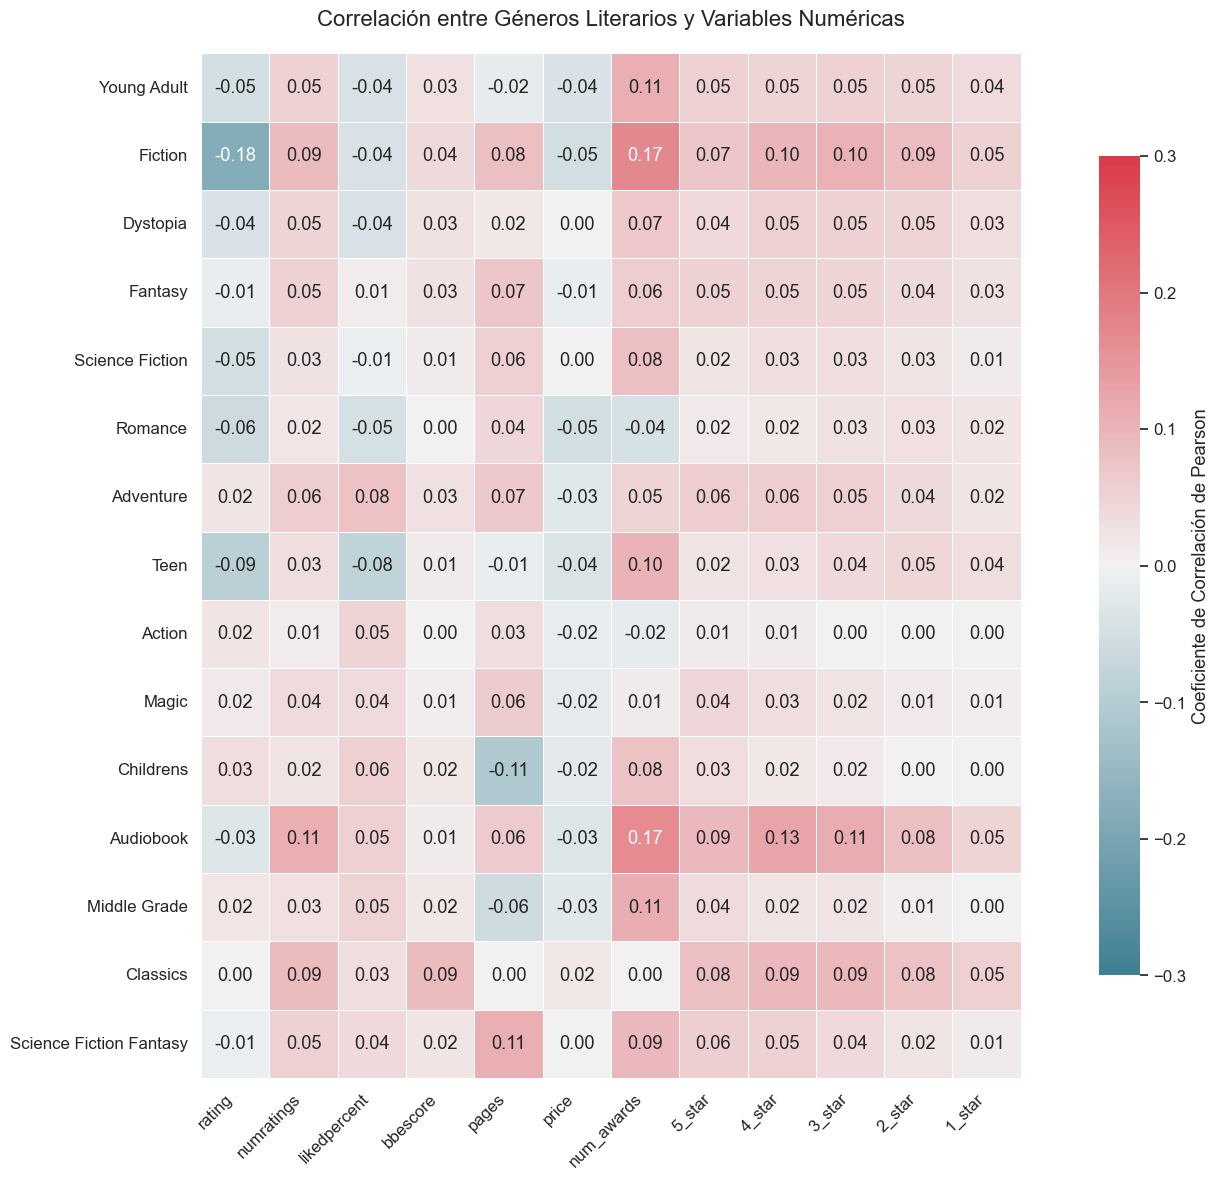


Promedio de variables por género:

Young Adult:
  bbescore: 166.0% más que otros géneros
  5_star: 112.6% más que otros géneros
  1_star: 98.0% más que otros géneros
  num_awards: 92.7% más que otros géneros
  numratings: 89.7% más que otros géneros

Fiction:
  bbescore: 1072.5% más que otros géneros
  2_star: 315.3% más que otros géneros
  3_star: 312.9% más que otros géneros
  4_star: 281.9% más que otros géneros
  num_awards: 278.7% más que otros géneros

Dystopia:
  bbescore: 299.0% más que otros géneros
  2_star: 181.3% más que otros géneros
  1_star: 176.0% más que otros géneros
  4_star: 171.2% más que otros géneros
  numratings: 168.7% más que otros géneros

Fantasy:
  bbescore: 143.5% más que otros géneros
  5_star: 106.8% más que otros géneros
  numratings: 82.8% más que otros géneros
  4_star: 70.2% más que otros géneros
  1_star: 66.2% más que otros géneros

Science Fiction:
  num_awards: 85.4% más que otros géneros
  bbescore: 80.3% más que otros géneros
  4_star: 60.9% m

In [68]:
# Análisis de correlación entre géneros y variables numéricas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Seleccionamos las variables numéricas más interesantes para correlacionar con los géneros
variables_numericas = [
    'rating', 'numratings', 'likedpercent', 'bbescore', 
    'pages', 'price', 'num_awards', '5_star', '4_star', '3_star', '2_star', '1_star'
]

# Seleccionamos los géneros más populares (limitamos a 15 para mejor visualización)
columnas_generos = [col for col in books.columns if col.startswith('genre_')][:15]

# Creamos un DataFrame para almacenar las correlaciones
correlaciones = pd.DataFrame(index=columnas_generos, columns=variables_numericas)

# Calculamos la correlación de Pearson entre cada género y cada variable numérica
for genero in columnas_generos:
    for variable in variables_numericas:
        if variable in books.columns:  # Verificamos que la variable exista
            try:
                # Calculamos la correlación y el p-valor
                corr, p_valor = pearsonr(books[genero].astype(float), books[variable])
                # Solo guardamos correlaciones estadísticamente significativas (p < 0.05)
                correlaciones.loc[genero, variable] = corr if p_valor < 0.05 else 0.0
            except Exception as e:
                print(f"Error al calcular correlación entre {genero} y {variable}: {e}")
                correlaciones.loc[genero, variable] = 0.0
        else:
            correlaciones.loc[genero, variable] = 0.0

# Aseguramos que todos los valores sean numéricos
correlaciones = correlaciones.astype(float)

# Limpiamos los nombres de los géneros para la visualización
correlaciones.index = [genero.replace('genre_', '') for genero in correlaciones.index]

# Configuramos el estilo de la visualización
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.1)
sns.set_style("white")

# Creamos un mapa de calor con una paleta divergente
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generamos el heatmap
heatmap = sns.heatmap(
    correlaciones, 
    annot=True,                  # Mostrar valores
    fmt=".2f",                   # Formato de dos decimales
    cmap=cmap,                   # Paleta de colores
    vmin=-0.3, vmax=0.3,         # Rango de valores (ajustado para destacar diferencias)
    center=0,                    # Centrar en 0
    square=True,                 # Celdas cuadradas
    linewidths=.5,               # Ancho de líneas entre celdas
    cbar_kws={"shrink": .8, "label": "Coeficiente de Correlación de Pearson"}
)

# Añadimos título y ajustamos diseño
plt.title('Correlación entre Géneros Literarios y Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardamos la imagen
plt.savefig('images/genre_correlations.png', dpi=300, bbox_inches='tight')

# Mostramos el gráfico
plt.show()

# Análisis adicional: Promedio de variables por género
print("\nPromedio de variables por género:")
resultados = pd.DataFrame(index=columnas_generos)

for genero in columnas_generos:
    for variable in variables_numericas:
        if variable in books.columns:
            try:
                # Calculamos el promedio de la variable para libros de este género
                promedio_con_genero = books[books[genero] == 1][variable].mean()
                # Calculamos el promedio de la variable para libros sin este género
                promedio_sin_genero = books[books[genero] == 0][variable].mean()
                # Guardamos la diferencia porcentual
                diff_pct = ((promedio_con_genero / promedio_sin_genero) - 1) * 100
                resultados.loc[genero, f"{variable}_diff"] = diff_pct
            except Exception as e:
                print(f"Error al calcular promedios entre {genero} y {variable}: {e}")
                resultados.loc[genero, f"{variable}_diff"] = 0.0
        else:
            resultados.loc[genero, f"{variable}_diff"] = 0.0

# Aseguramos que todos los valores sean numéricos
resultados = resultados.astype(float)

# Limpiamos los nombres de los géneros
resultados.index = [genero.replace('genre_', '') for genero in resultados.index]

# Mostramos las 5 diferencias más significativas para cada género
for genero in resultados.index:
    print(f"\n{genero}:")
    # Ordenamos las variables por diferencia absoluta
    top_diffs = resultados.loc[genero].abs().sort_values(ascending=False).head(5)
    for variable, diff in zip(top_diffs.index, resultados.loc[genero, top_diffs.index]):
        variable_name = variable.split('_diff')[0]
        print(f"  {variable_name}: {diff:.1f}% {'más' if diff > 0 else 'menos'} que otros géneros")

In [69]:
# Init analysis about description column


# Curious about possibility of correlation in missing description
books["missing_description"] = np.where(books["description"].isna(), 1, 0)

books["age_of_book"] = 2025 - books["publishdate"].dt.year
books["age_of_book"]

0        17
1        21
2        19
3        25
4        19
         ..
52472    12
52474    14
52475    14
52476    14
52477    14
Name: age_of_book, Length: 51410, dtype: int32

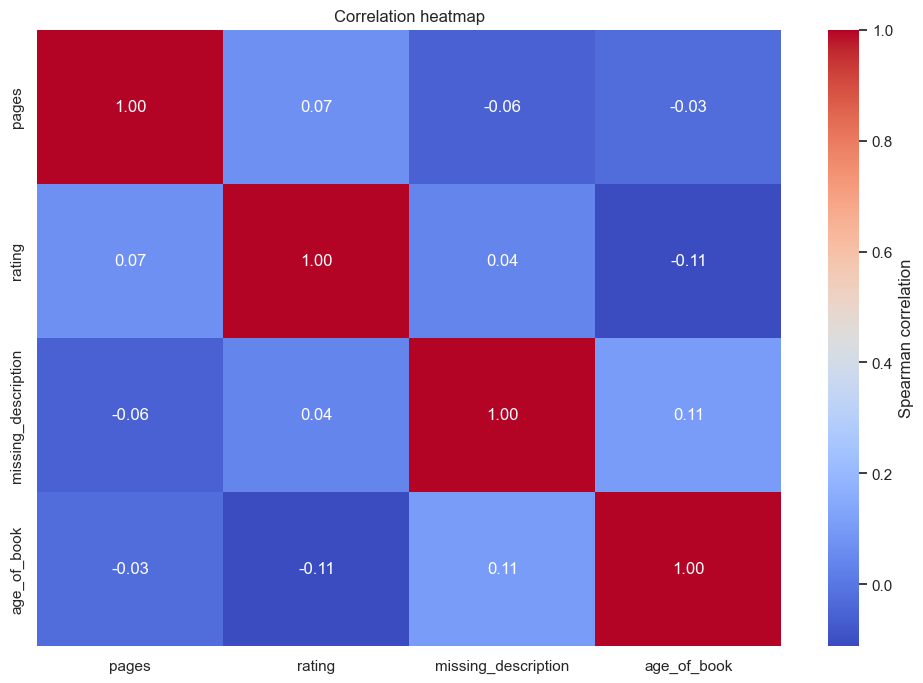

In [70]:
columns_of_interest = ["pages","rating","missing_description","age_of_book"]

#We use spearman correlation to handle the non-linear relationship between the variables
#pearson correlation is not suitable for this data because it assumes a linear relationship between the variables
correlation_matrix = books[columns_of_interest].corr(method="spearman")

#We do this to check if missing description is correlated with other variables to know if we should drop books with missing description
sns.set_theme(style="white")
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()


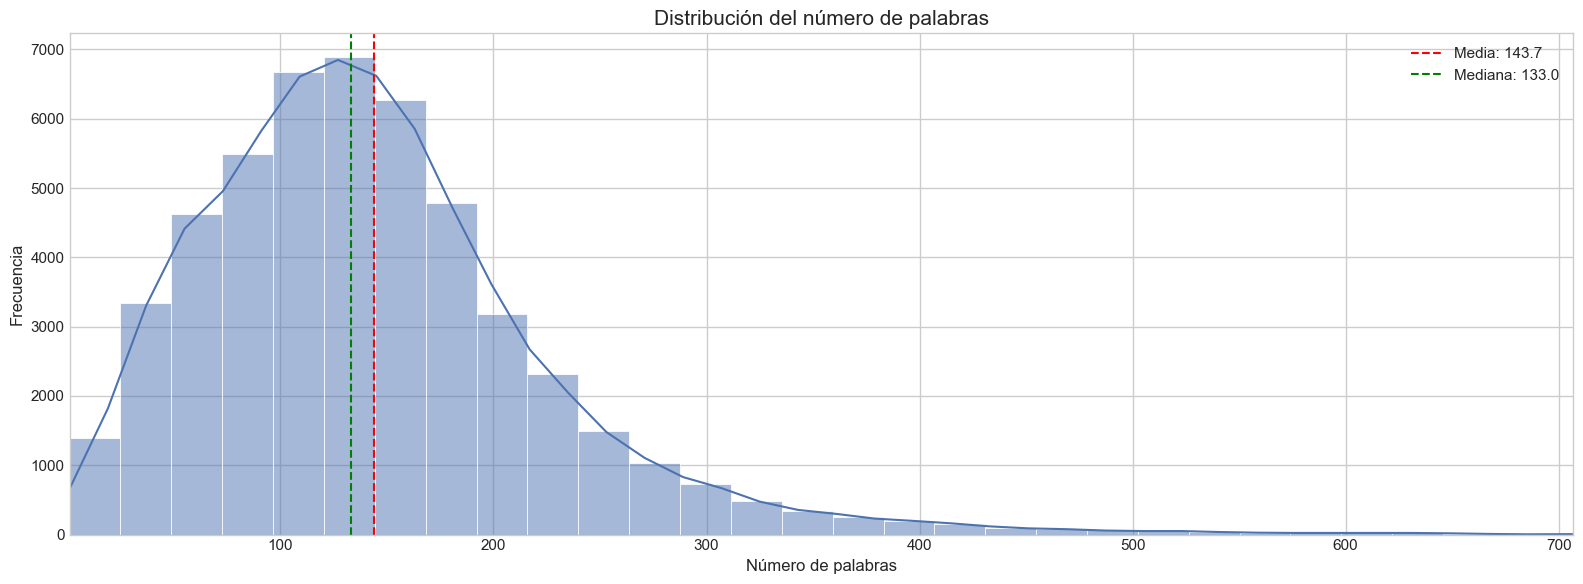

In [71]:
# Words in column description

# We need to know how much words is a good description
books["words_in_description"] = books["description"].str.split().str.len()

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Crear figura
plt.figure(figsize=(16, 6))

# Calcular percentiles para establecer límites razonables
pInit = np.percentile(books['words_in_description'].dropna(), 0)
pEnd = np.percentile(books['words_in_description'].dropna(), 99.9)

# Histograma con límites en los percentiles
sns.histplot(books['words_in_description'].dropna(), kde=True, bins=150)
plt.xlim(pInit, pEnd)  # Establecer límites en los ejes X

# Añadir línea vertical con la media y mediana
plt.axvline(books['words_in_description'].mean(), color='red', linestyle='--', 
            label=f'Media: {books["words_in_description"].mean():.1f}')
plt.axvline(books['words_in_description'].median(), color='green', linestyle='--', 
            label=f'Mediana: {books["words_in_description"].median():.1f}')

plt.title('Distribución del número de palabras', fontsize=15)
plt.xlabel('Número de palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
books.loc[books["words_in_description"].between(1, 4), "description"]

2876     1949年にジョージ・オーウェルは、近未来小説としての『1984』を刊行した。\nそして20...
4463     1949年にジョージ・オーウェルは、近未来小説としての『1984』を刊行した。\n\nそして...
4582                                 The battle ends here!
4927               大ヒット作「美少女戦士セーラームーン」が新装版に! カバーはすべて描き下ろし!
5060                                          مجموعة قصصية
                               ...                        
52127    真夜中に始めよう――血と硝煙のフルコース。\n\n緑の魔女と人狼の呪い…その正体を暴いたセバ...
52176    主人の塵は、遠刺の瞳で撃ち払う――\n\n緑の魔女を巡るドイツ軍との戦いを制したセバスチャン...
52235                                      داستانهای فارسی
52301                             Tale of Mrs. Tittlemouse
52373                                 Baryshnya-krestyanka
Name: description, Length: 222, dtype: object

In [73]:
books.loc[books["words_in_description"].between(15, 40), "description"]

9        Scarlett O'Hara, the beautiful, spoiled daught...
61       Twelve-year-old Jonas lives in a seemingly ide...
96       The adventures of Christopher Robin and his fr...
97       This single volume brings together all of Poe'...
114      Charlie Bucket's wonderful adventure begins wh...
                               ...                        
52326    Lars Noréns nya bok innehåller drygt femhundra...
52332    History with the nasty bits left in. Awful inf...
52358    The distant future war continues, Old man Prop...
52360    Geeder's summer at her uncle's farm is made sp...
52460    Against a seething backdrop of social unrest a...
Name: description, Length: 2715, dtype: object

In [74]:
# description column


# We'll focus on:
# 1. Removing books without English descriptions
# 2. Keeping only books with descriptions between 25-450 words
# 3. Truncating descriptions longer than 450 words

# First, let's create a flag for non-English descriptions
books['is_english_description'] = books['description'].notna() & (books['language'] == 'English')

# Create a flag for descriptions with appropriate length (between 25 and 450 words)
books['has_proper_description_length'] = books['words_in_description'].between(25, 450)

# Filter the dataset to keep only books with English descriptions of proper length
filtered_books = books[books['is_english_description'] & books['has_proper_description_length']].copy()

# Truncate descriptions longer than 450 words
def truncate_description(desc, max_words=450):
    if pd.isna(desc):
        return desc
    words = desc.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + '...'
    return desc

filtered_books['description'] = filtered_books['description'].apply(lambda x: truncate_description(x))

# Verify the results
print(f"Original dataset size: {len(books)}")
print(f"Filtered dataset size: {len(filtered_books)}")
print(f"Removed {len(books) - len(filtered_books)} books ({((len(books) - len(filtered_books)) / len(books) * 100):.2f}%)")

# Check the word count distribution after filtering
filtered_books = filtered_books.drop(['is_english_description', 'has_proper_description_length'], axis=1)
books = filtered_books

Original dataset size: 51410
Filtered dataset size: 43349
Removed 8061 books (15.68%)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


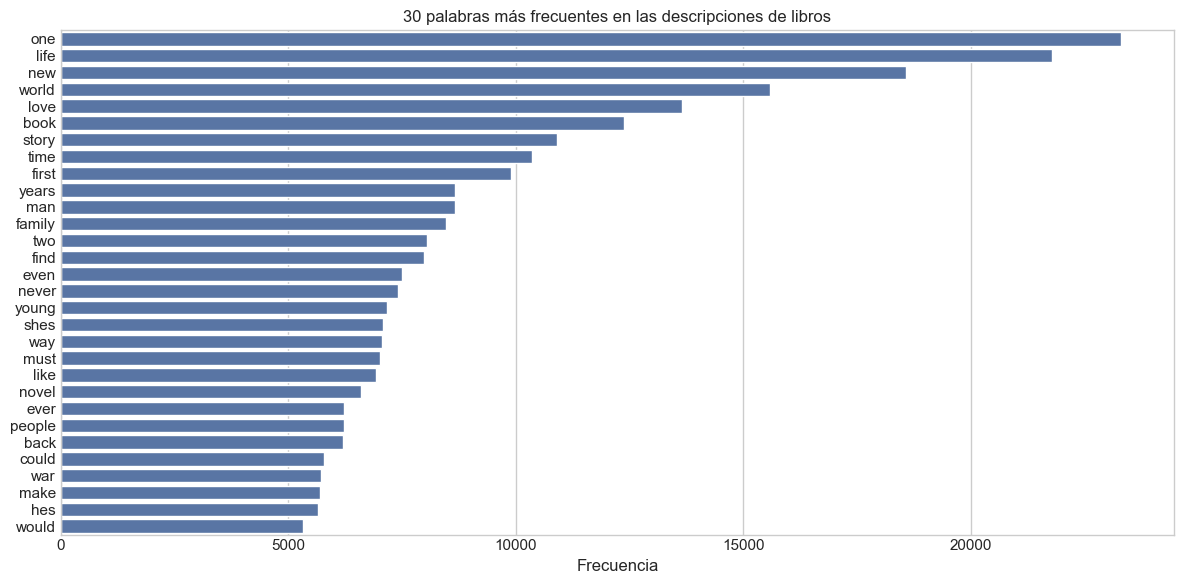

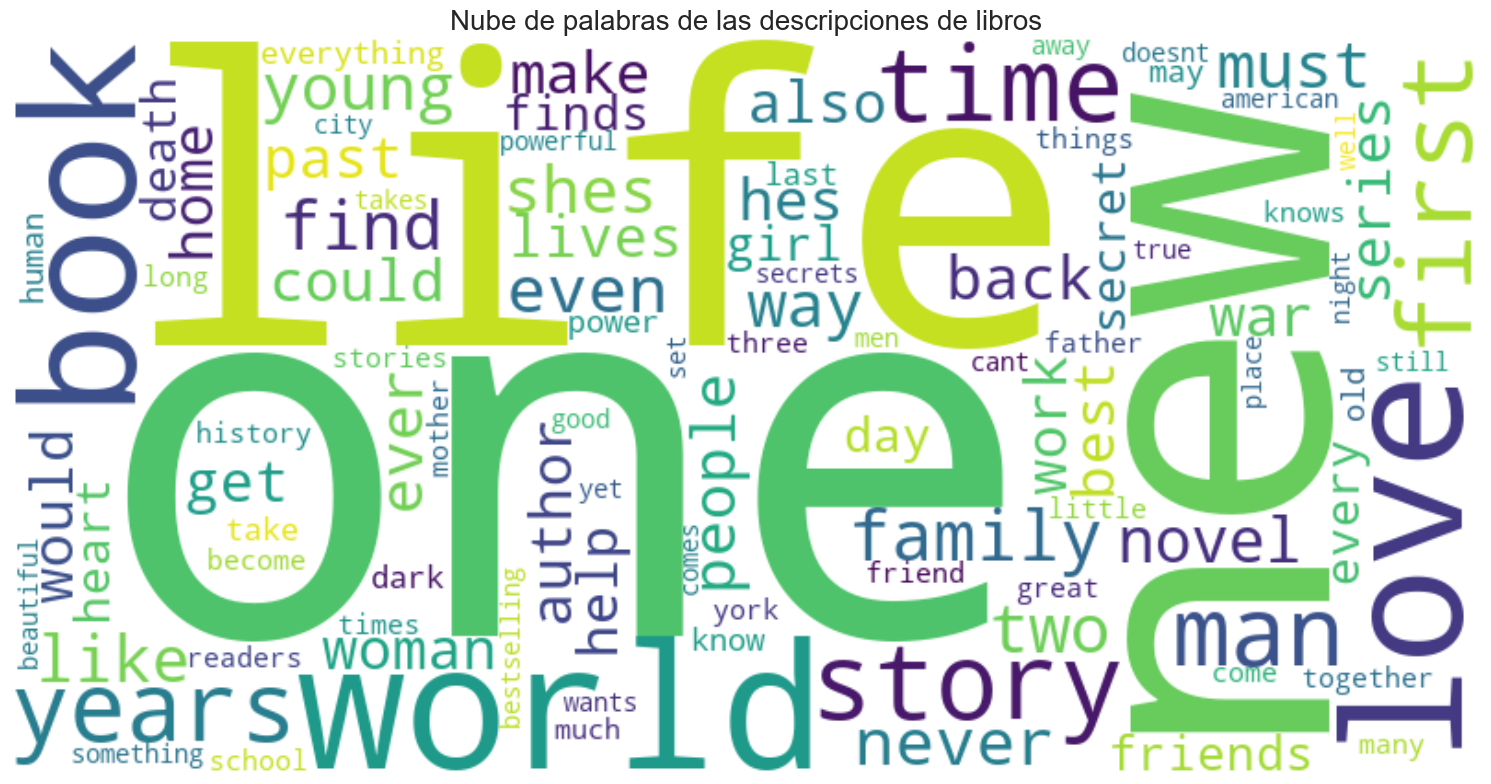

Los 5 géneros más comunes:
Fiction: 27226
Romance: 13854
Fantasy: 13500
Young Adult: 10786
Contemporary: 9400


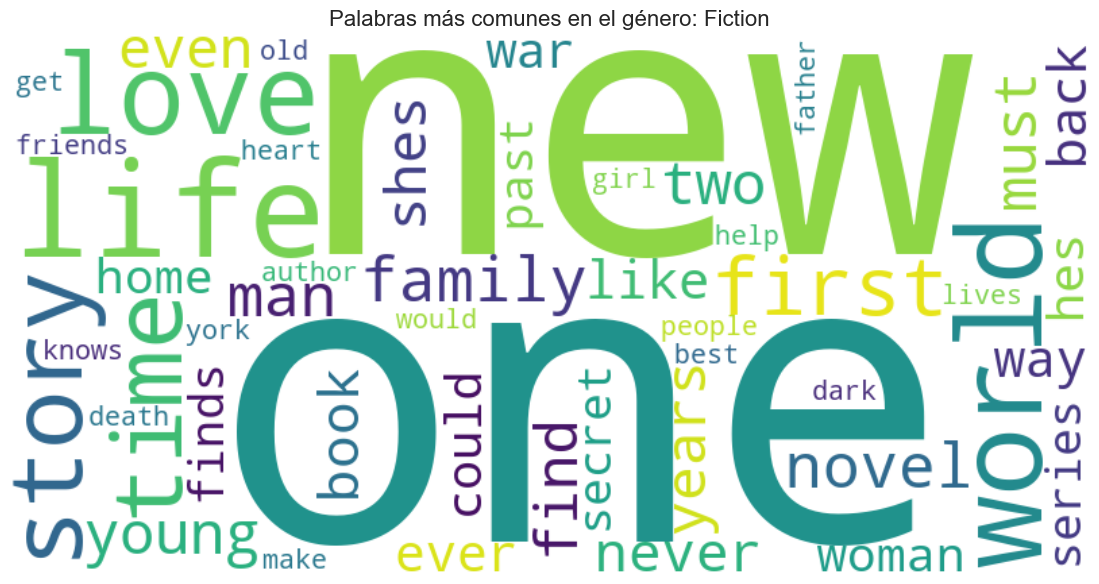

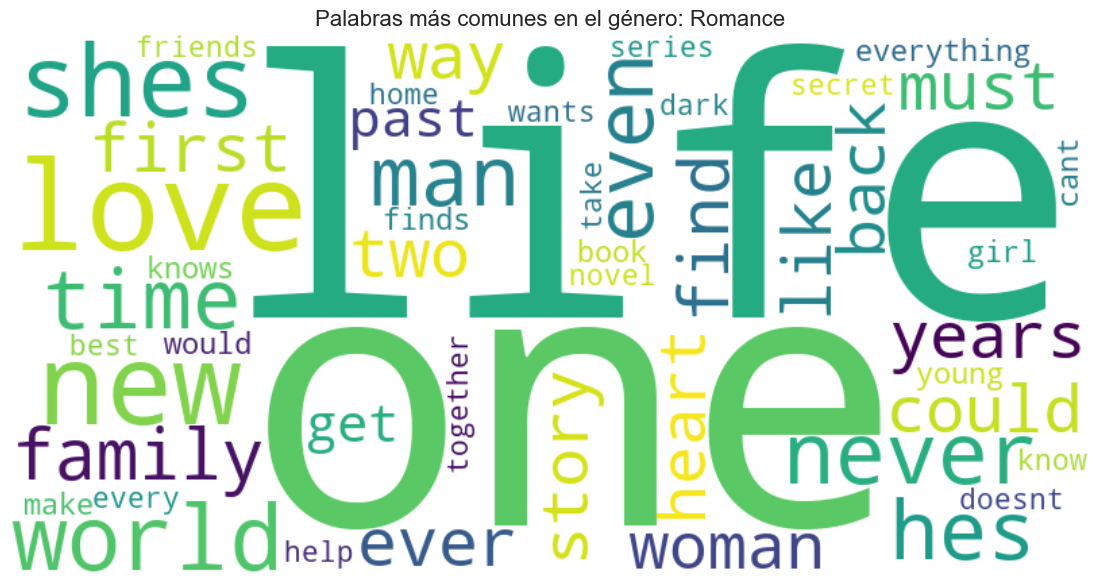

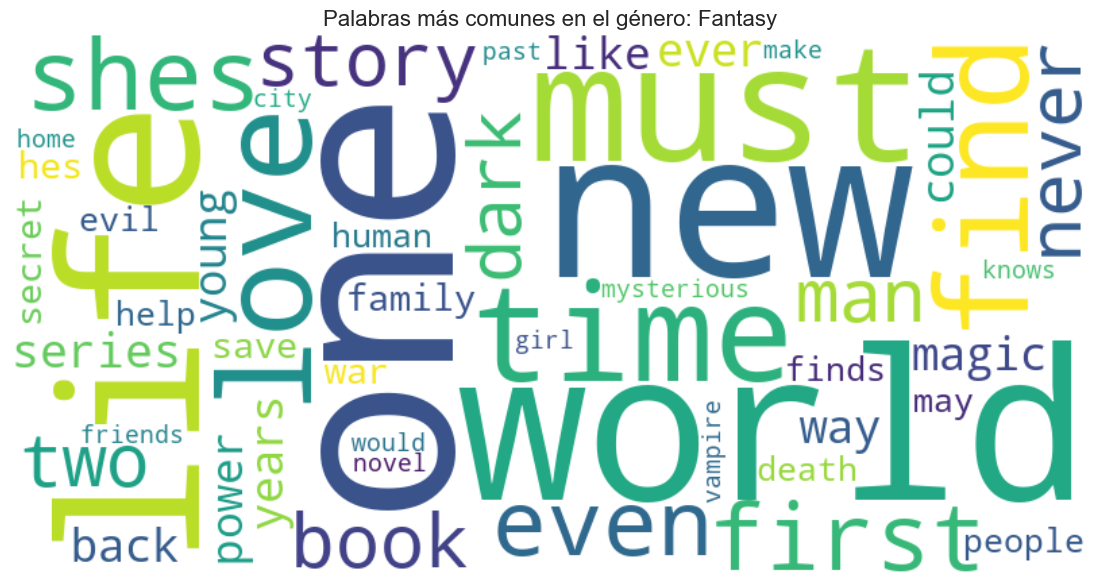

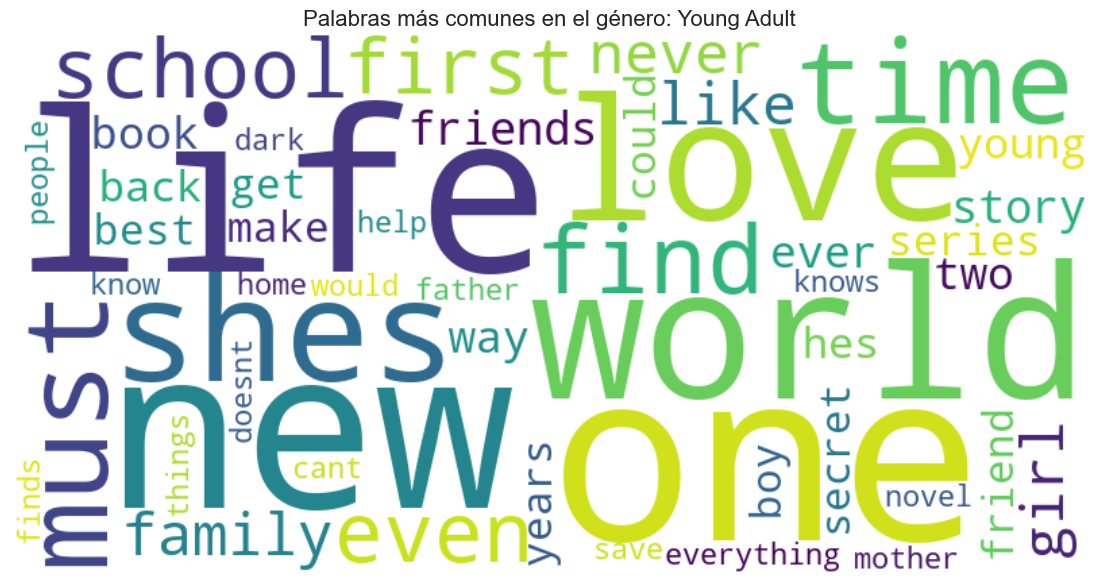

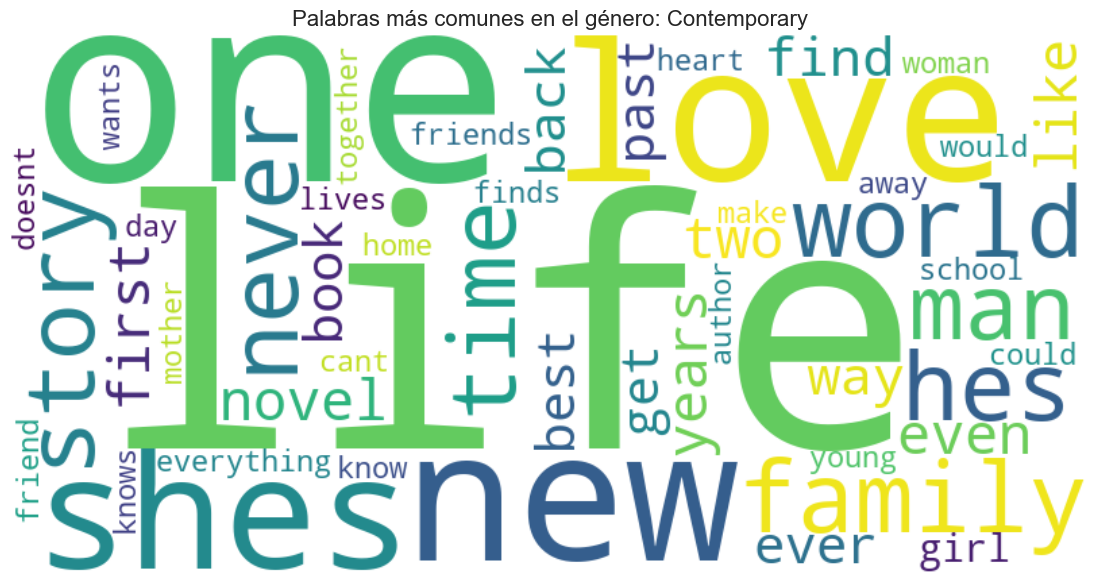

In [75]:
# Analysis of more frequent words in description column

import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Función para limpiar y tokenizar texto (sin usar word_tokenize)
def clean_text(text):
    if pd.isna(text):
        return []
    # Convertir a minúsculas y eliminar caracteres especiales
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenizar simplemente dividiendo por espacios
    tokens = text.split()
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Procesar todas las descripciones
all_words = []
for desc in books['description']:
    all_words.extend(clean_text(desc))

# Contar frecuencia de palabras
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(30)

# Visualizar las palabras más comunes
plt.figure(figsize=(12, 6))
words, counts = zip(*most_common_words)
sns.barplot(x=list(counts), y=list(words))
plt.title('30 palabras más frecuentes en las descripciones de libros')
plt.xlabel('Frecuencia')
plt.tight_layout()
plt.show()

# Crear nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(dict(word_counts.most_common(100)))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las descripciones de libros', fontsize=20)
plt.tight_layout()
plt.show()

# Análisis por géneros más populares
# Asegurarse de que la columna 'genres_list' existe
if 'genres_list' not in books.columns:
    books['genres_list'] = books['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Identificar los 5 géneros más comunes
all_genres = []
for genres in books['genres_list']:
    all_genres.extend(genres)
    
top_genres = Counter(all_genres).most_common(5)
print("Los 5 géneros más comunes:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

# Crear nubes de palabras para cada género principal
for genre, _ in top_genres:
    # Filtrar libros por género
    genre_books = books[books['genres_list'].apply(lambda x: genre in x)]
    
    # Procesar descripciones
    genre_words = []
    for desc in genre_books['description']:
        genre_words.extend(clean_text(desc))
    
    # Contar palabras
    genre_word_counts = Counter(genre_words)
    
    # Crear nube de palabras
    genre_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                               max_words=50, contour_width=3, contour_color='steelblue')
    genre_wordcloud.generate_from_frequencies(dict(genre_word_counts.most_common(50)))
    
    plt.figure(figsize=(12, 6))
    plt.imshow(genre_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palabras más comunes en el género: {genre}', fontsize=16)
    plt.tight_layout()
    plt.show()

In [76]:
import os

processed_dir = 'processed_data'
os.makedirs(processed_dir, exist_ok=True)

# 2. Guardar en formato CSV (el más común y versátil)
books.to_csv(f"{processed_dir}/books_cleaned.csv", index=False)
print(f"Dataset guardado en CSV: {processed_dir}/books_cleaned.csv")

books.head()

Dataset guardado en CSV: processed_data/books_cleaned.csv


bookid                                      title                 series  \
0       0                           The Hunger Games    The Hunger Games #1   
1       0  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2       0                      To Kill a Mockingbird  To Kill a Mockingbird   
3       0                        Pride and Prejudice   Not part of a series   
4       0                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language           isbn  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English  9780439023481   
1  There is a door at the end of a silent corrido...  English  9780439358071   
2  The unforgettable novel of a childhood in a sl...  English      NO_ISBN_2   
3  Alternate cover edition of ISBN 9780679783268S...  English      NO_ISBN_3   
4  About three things I was absolutely positive.\...  English  9780316015844   

                                              genres  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   

                                          characters bookformat  pages  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  Hardcover    374   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  Paperback    870   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  Paperback    324   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...  Paperback    279   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...  Paperback    501   

                          publisher publishdate  \
0                  Scholastic Press  2008-09-14   
1                   Scholastic Inc.  2004-09-28   
2  Harper Perennial Modern Classics  2006-05-23   
3                    Modern Library  2000-10-10   
4         Little, Brown and Company  2006-09-06   

                                              awards  numratings  \
0  ['Locus Award Nominee for Best Young Adult Boo...     6376780   
1  ['Bram Stoker Award for Works for Young Reader...     2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...     4501075   
3                                                 []     2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...     4964519   

   likedpercent                                            setting  \
0          96.0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   
1          98.0  ['Hogwarts School of Witchcraft and Wizardry (...   
2          95.0               ['Maycomb, Alabama (United States)']   
3          94.0  ['United Kingdom', 'Derbyshire, England (Unite...   
4          78.0  ['Forks, Washington (United States)', 'Phoenix...   

                                            coverimg   bbescore  bbevotes  \
0  https://i.gr-assets.com/images/S/compressed.ph...  2993816.0     30516   
1  https://i.gr-assets.com/images/S/compressed.ph...  2632233.0     26923   
2  https://i.gr-assets.com/images/S/compressed.ph...  2269402.0     23328   
3  https://i.gr-assets.com/images/S/compressed.ph...  1983116.0     20452   
4  https://i.gr-assets.com/images/S/compressed.ph...  1459448.0     14874   

   price  num_awards   5_star   4_star   3_star  2_star  1_star  \
0   5.09          41  3444695  1921313   745221  171994   93557   
1   7.38           9  1593642   637516   222366   39573   14526   
2   5.20           4  2363896  1333153   573280  149952   80794   
3   5.20           0  1617567   816659   373311  113934   76